## Name- Ranjan Pratap Singh                                                      DS2307

# Rainfall Weather Forecasting
## Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Importing Dataset

In [93]:
df = pd.read_csv(r"C:\Users\RANJAN\Downloads\weatherAUS.csv")

### Exploratory Data Analysis(EDA)  ----->

In [94]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Our dataset of Rainfall Weather Forecasting has 8425 rows × 23 columns and we have two target varibale that is 1) Rainfall - that is of continuous in nature so we will use regression models to train, test , predict the data 2)RainTomorrow that is of categorical in nature so we will use classification models to train,test, and predict the data

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

here we can see that our dataset contain two dtpyes i.e. object and float and there are  null values in our data set  we will further check later for white spaces 

In [97]:
#  checking the values counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

here we can see that there are no white spaces but there are null values so we will do various steps to fill these 

In [98]:
df['Date'] = pd.to_datetime(df['Date'])    

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

In [101]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [102]:
df[['MinTemp','MaxTemp','Rainfall','Temp9am','Temp3pm']] = df[['MinTemp','MaxTemp','Rainfall','Temp9am','Temp3pm']].fillna(df[['MinTemp','MaxTemp','Rainfall','Temp9am','Temp3pm']].mean())
df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']] = df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].fillna(df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].median())
df[['RainToday','RainTomorrow']] = df[['RainToday','RainTomorrow']].fillna(df[['RainToday','RainTomorrow']].mode().iloc[0])
df[['Evaporation','Sunshine','WindGustDir','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm']] = df[['Evaporation','Sunshine','WindGustDir','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm']].fillna(method='ffill')


In [103]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation      907
Sunshine         907
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           2
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

In [104]:
df[['Evaporation','Sunshine','Cloud3pm']] = df[['Evaporation','Sunshine','Cloud3pm']].fillna(method='bfill')

In [105]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [106]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
-1.100000      1
 1.400000      1
-1.400000      1
-1.700000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: MaxTemp, Length: 332, dtype: int64


0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
           

here we can see that there are no null values in the dataset

In [154]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,9.715739,8.212926,40.036320,13.840000,18.539585,67.876083,51.206172,1018.721531,1015.991691,4.664570,4.410564,17.762015,22.442934
std,5.379488,6.114516,10.309308,12.985209,3.236121,13.781296,10.128896,9.704899,16.835550,18.468219,6.764790,6.462053,3.013228,2.772149,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,3.800000,7.400000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,1.000000,1.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.000000,9.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1019.300000,1016.900000,6.000000,5.000000,17.762015,22.000000
75%,17.300000,28.000000,1.400000,8.600000,11.100000,48.000000,20.000000,24.000000,80.000000,63.000000,1024.600000,1020.100000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see some of the data  don't have same so that all  the data is not normally distributed

if we see for outliers we can observe that some coulmn may contain outliers that we will check  later in this model

## data visualization 

In [109]:
df1 = df.select_dtypes(include=['int', 'float'])

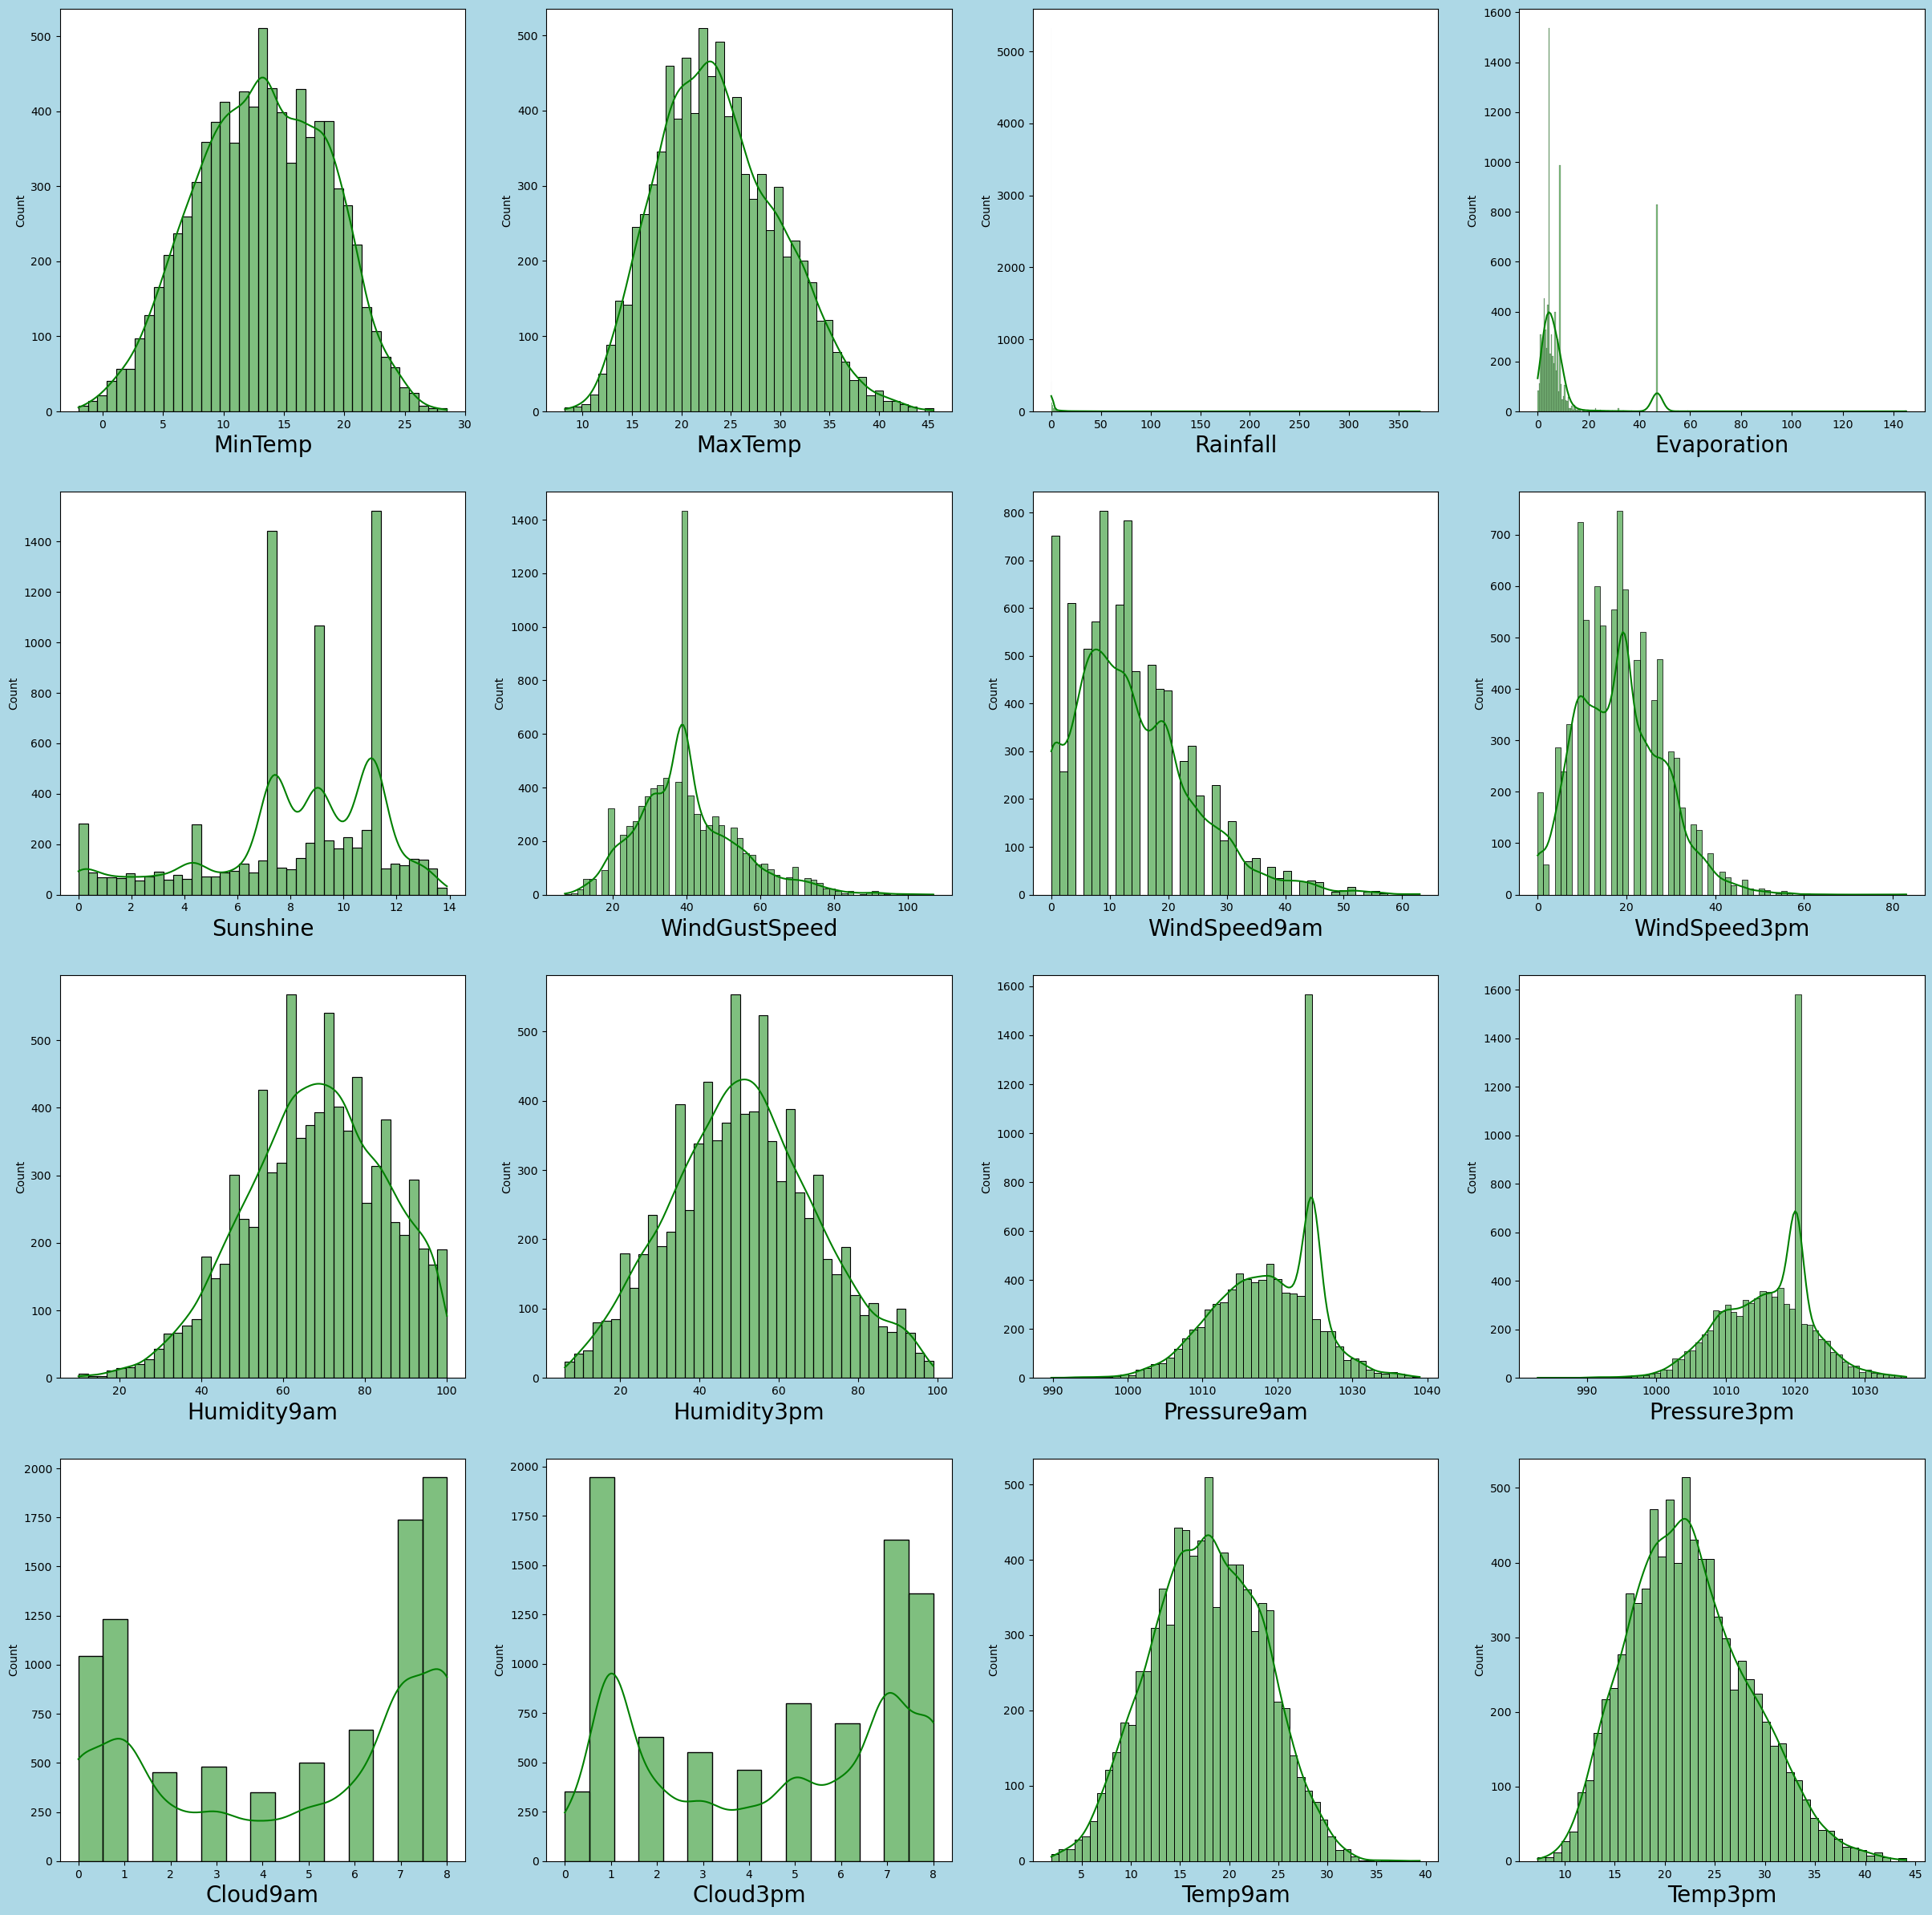

In [111]:
plt.figure(figsize=(30, 30), facecolor="lightblue")
plotnumber = 1
for i in df1: 
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x=df1[i], data=df1, kde=True, color='green')
        plt.xlabel(i,fontsize = 20)
    plotnumber += 1
plt.show()

here we can see that mostly data is  approximately normally distributed 

In [112]:
df2 = df.select_dtypes(include=['object'])

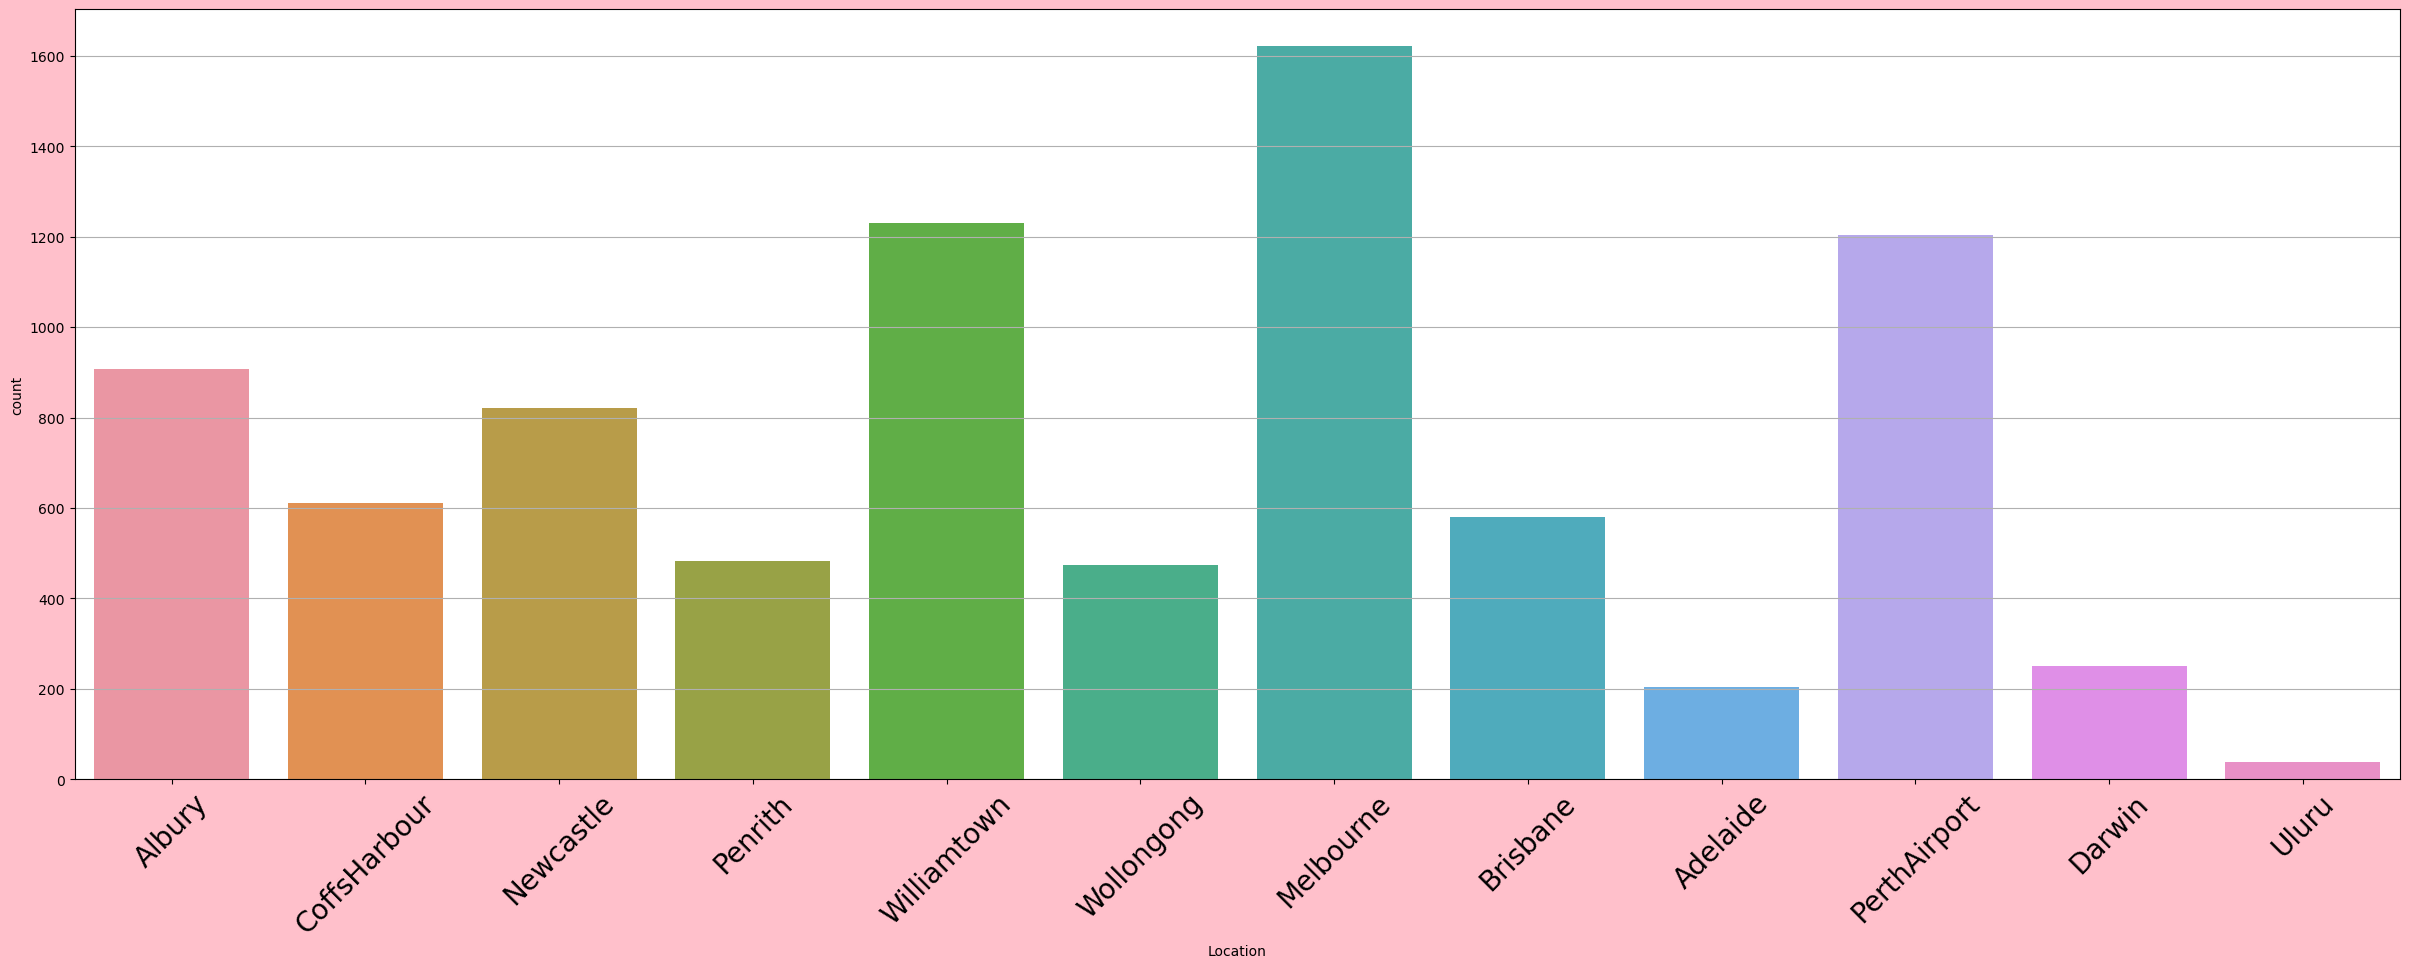

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [116]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='Location' , data = df )
plt.xticks(fontsize=20,rotation =45)
plt.grid(axis ='y')
plt.show()
df['Location'].value_counts()

 here we can see that mostly rainfall regions are Melbourne ,Williamtown ,PerthAirport    

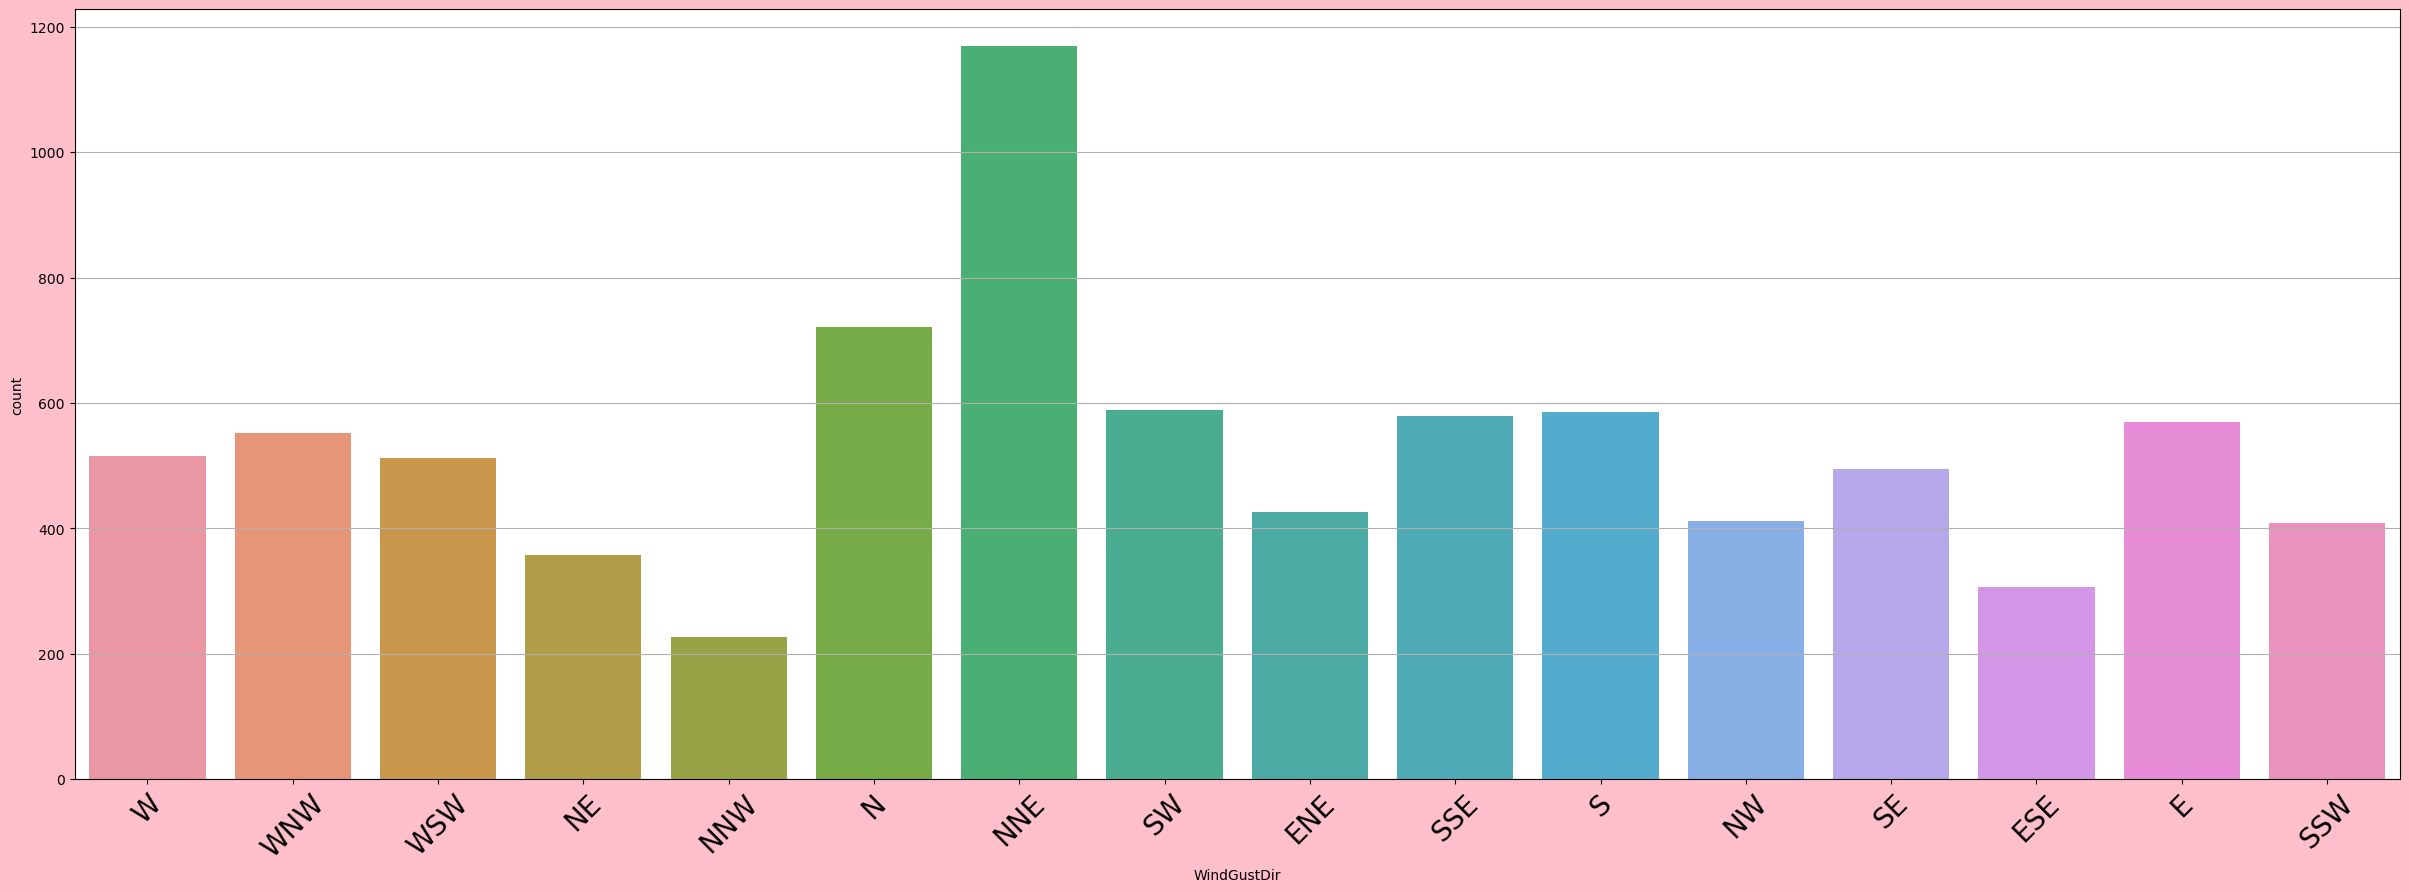

NNE    1169
N       721
SW      588
S       585
SSE     580
E       569
WNW     552
W       515
WSW     513
SE      494
ENE     426
NW      412
SSW     409
NE      358
ESE     307
NNW     227
Name: WindGustDir, dtype: int64

In [117]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='WindGustDir' , data = df )
plt.xticks(fontsize=20,rotation =45)
plt.grid(axis ='y')
plt.show()
df['WindGustDir'].value_counts()

here we can see that msotly Wind Gust Direction is North-northeast 

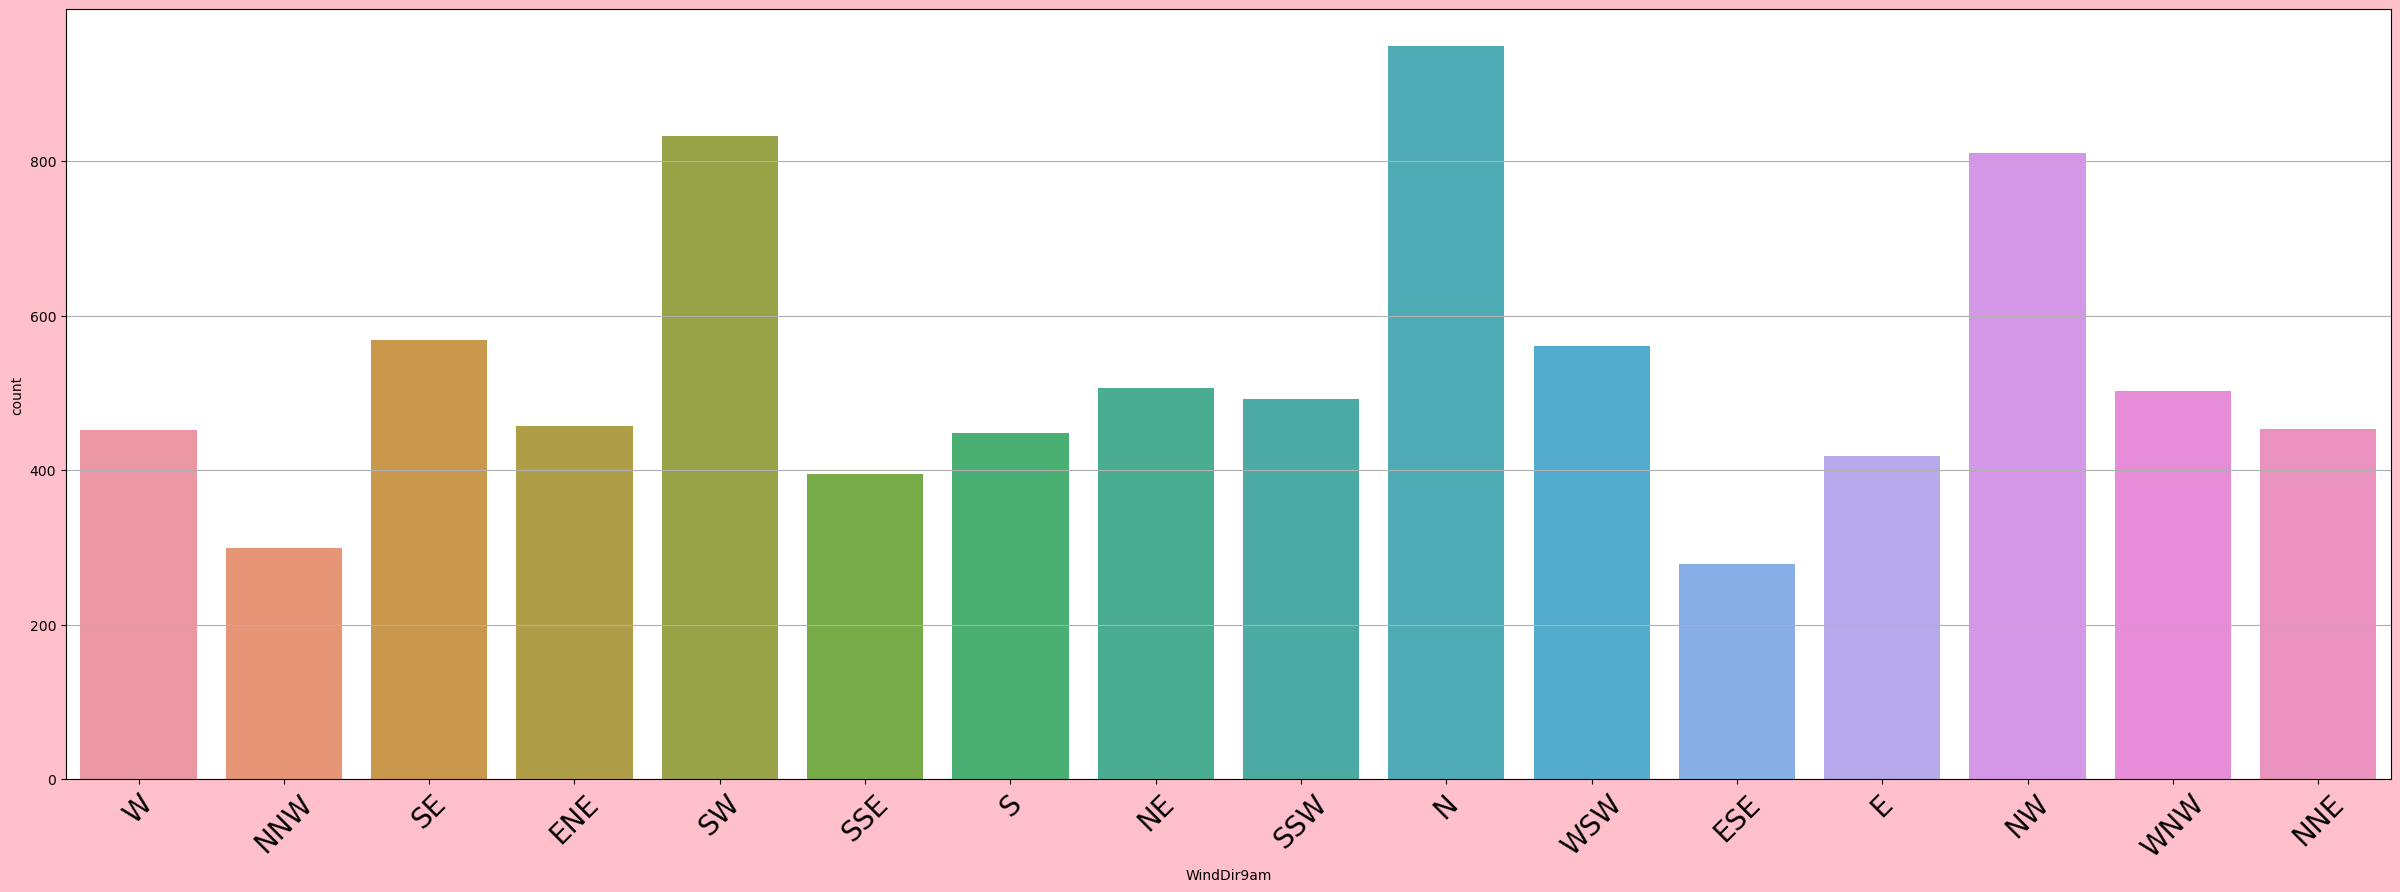

N      949
SW     833
NW     810
SE     568
WSW    561
NE     506
WNW    503
SSW    492
ENE    457
NNE    453
W      452
S      448
E      419
SSE    395
NNW    300
ESE    279
Name: WindDir9am, dtype: int64

In [118]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='WindDir9am' , data = df )
plt.xticks(fontsize=20,rotation =45)
plt.grid(axis ='y')
plt.show()
df['WindDir9am'].value_counts()

here we can see that wind direction at 9am is mostly north

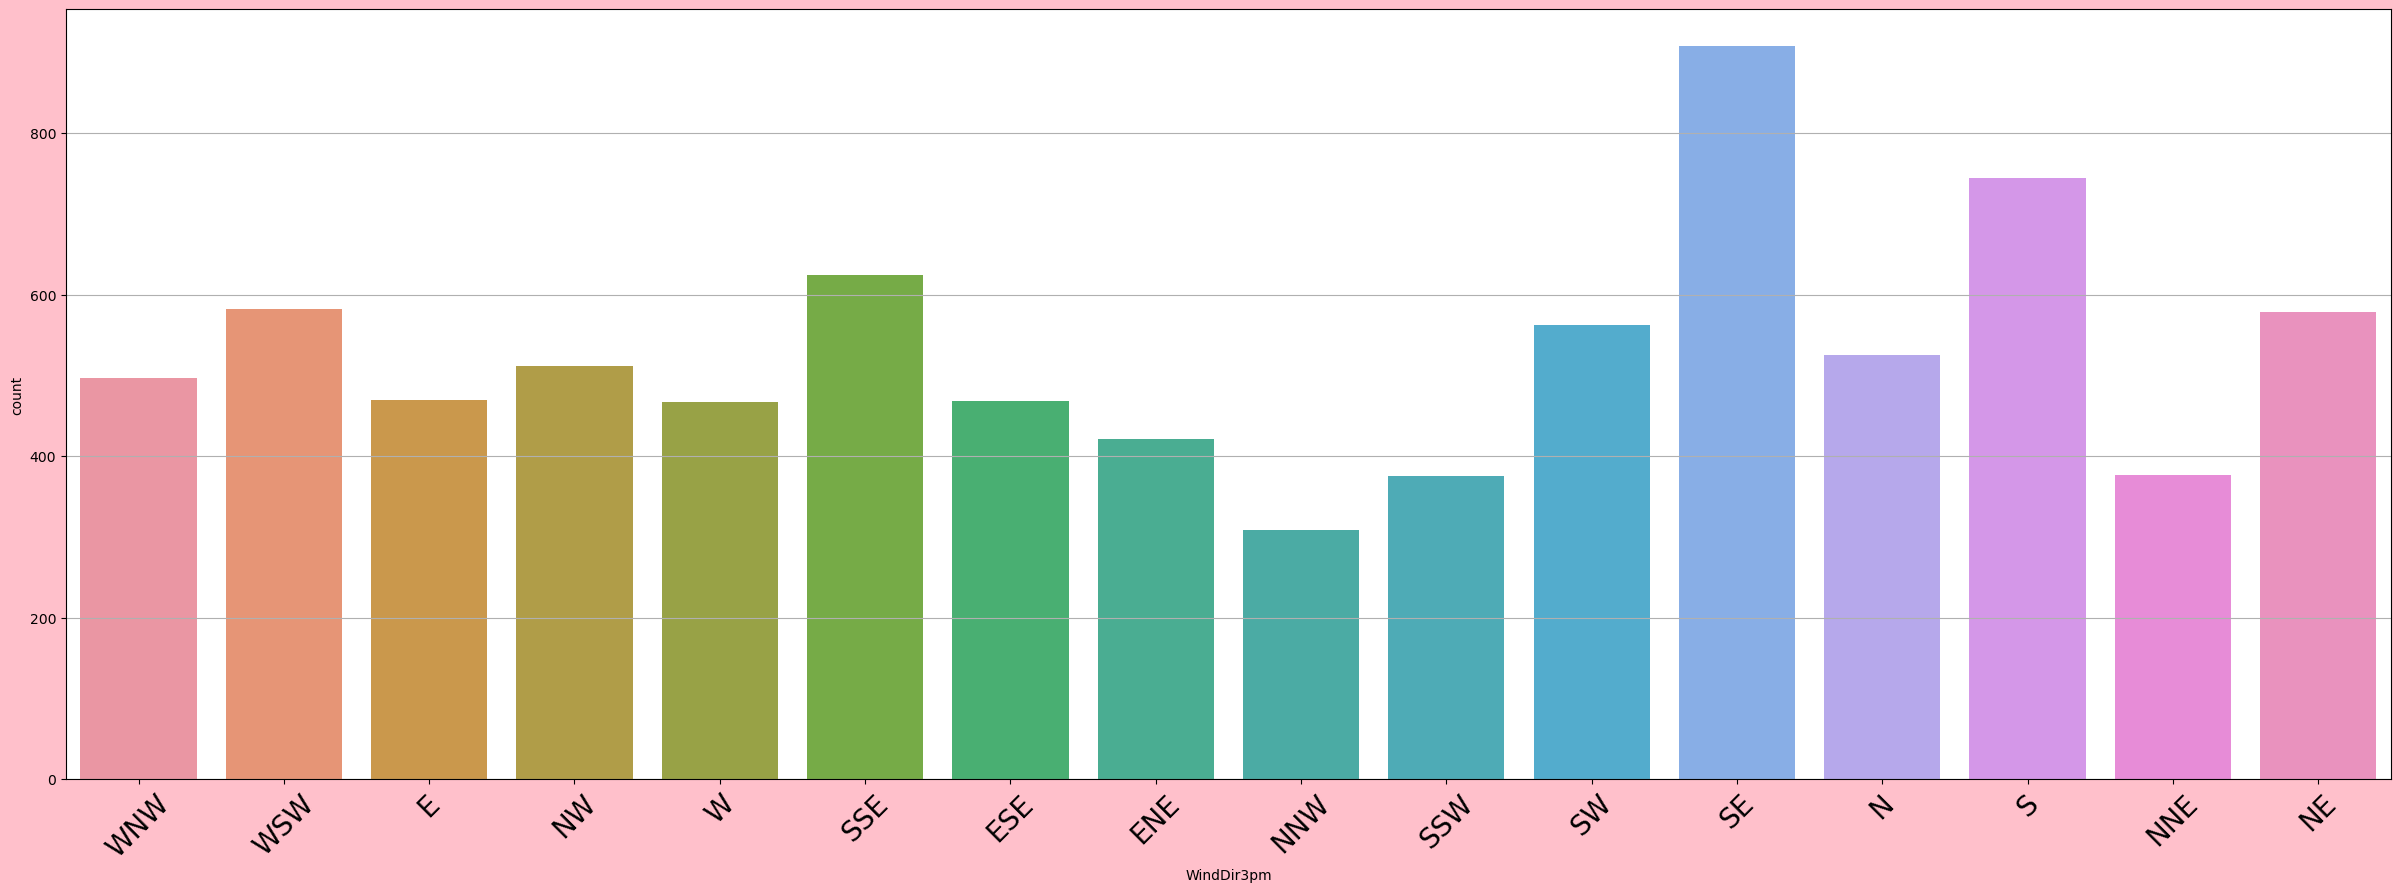

SE     908
S      745
SSE    625
WSW    583
NE     579
SW     562
N      526
NW     512
WNW    497
E      470
ESE    468
W      467
ENE    422
NNE    377
SSW    375
NNW    309
Name: WindDir3pm, dtype: int64

In [119]:
plt.figure(figsize=(30,10), facecolor="pink")
sns.countplot(x='WindDir3pm' , data = df )
plt.xticks(fontsize=20,rotation =45)
plt.grid(axis ='y')
plt.show()
df['WindDir3pm'].value_counts()

here we can see that wind direction at 3pm is mostly Southeast

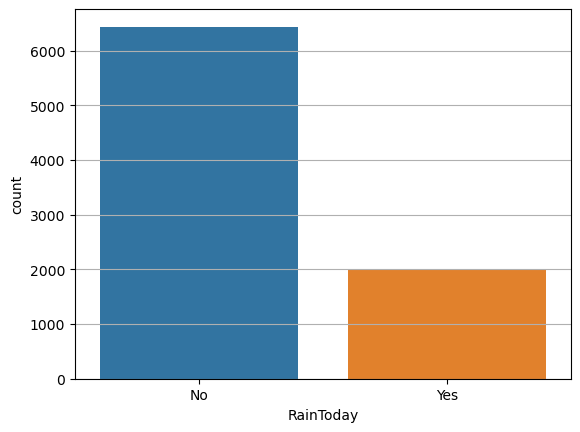

No     6435
Yes    1990
Name: RainToday, dtype: int64

In [122]:
sns.countplot(x='RainToday' , data = df )
plt.grid(axis ='y')
plt.show()
df['RainToday'].value_counts()

here we can see that mostly there is no rainfall today

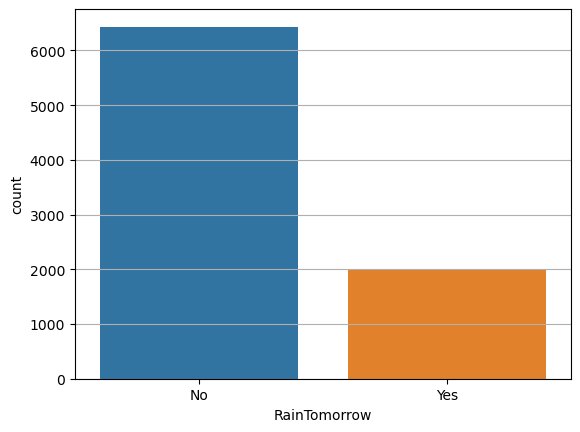

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [124]:
sns.countplot(x='RainTomorrow' , data = df )
plt.grid(axis ='y')
plt.show()
df['RainTomorrow'].value_counts()

here we can see that mostly next day there is no rainfall

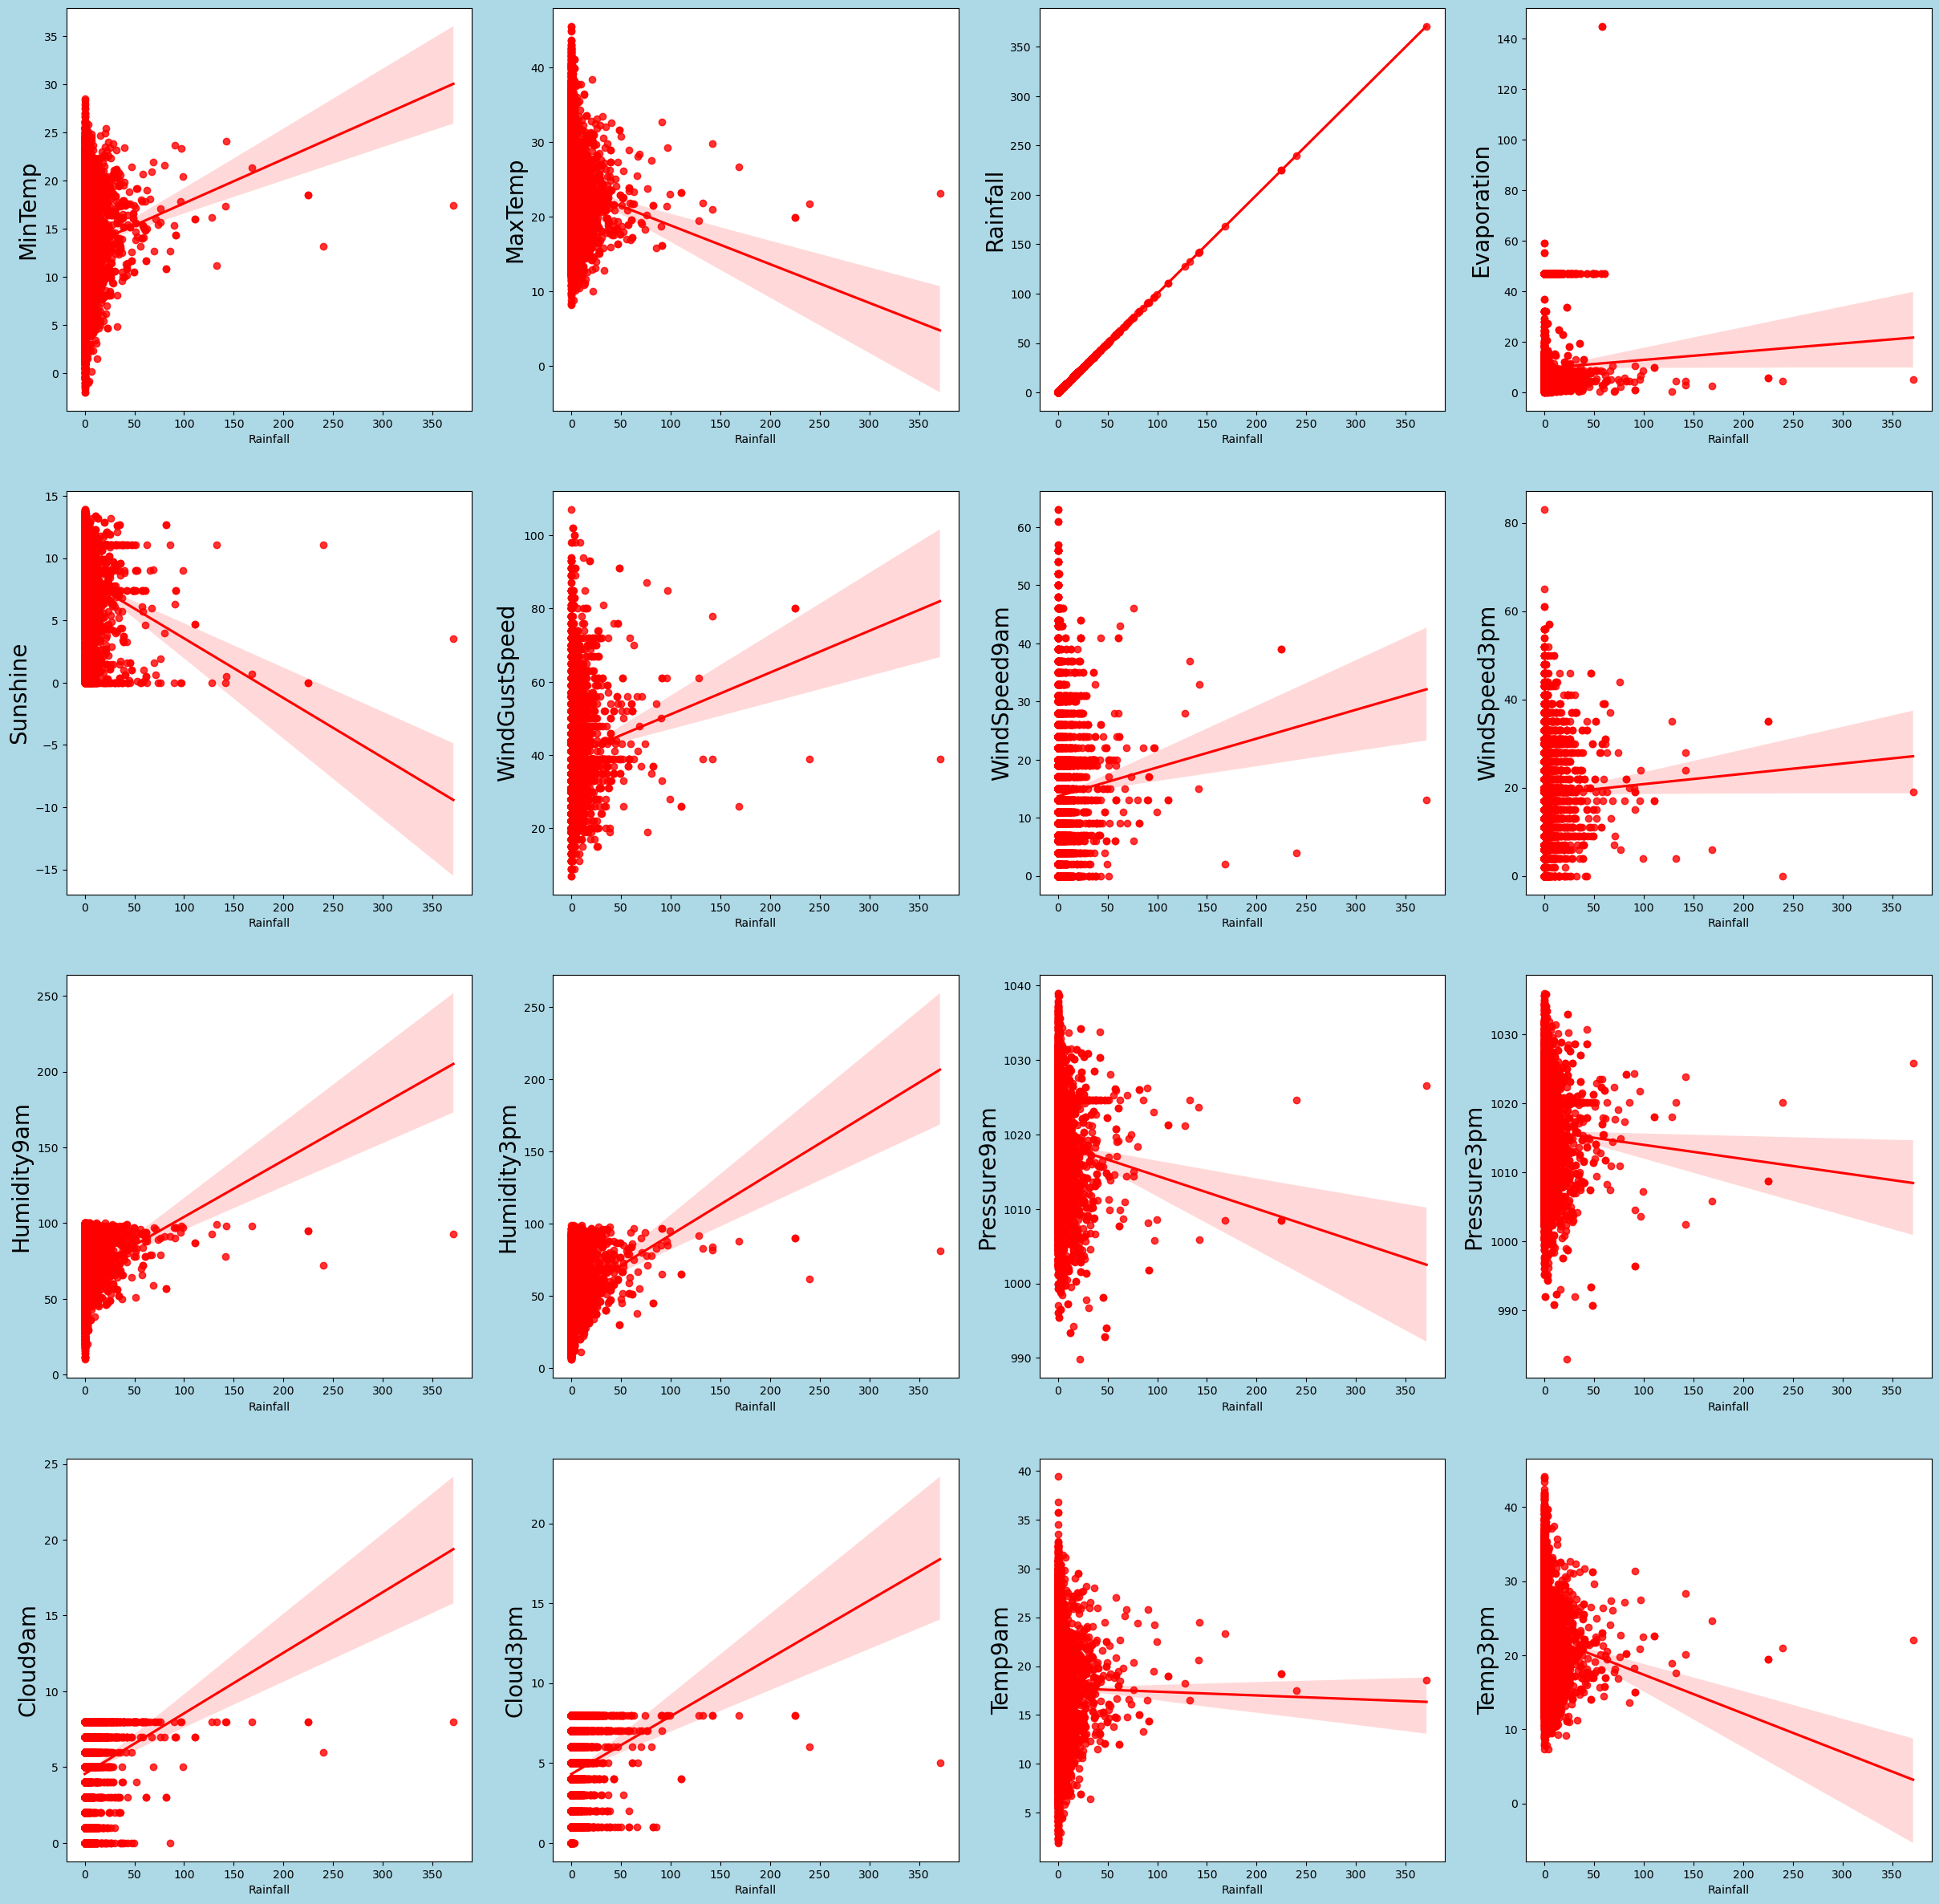

In [156]:
plt.figure(figsize=(30, 30), facecolor="lightblue")
plotnumber = 1
for i in df1: 
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.regplot(y=df1[i], x=df['Rainfall'], data=df1,color='red')
        plt.ylabel(i,fontsize = 20)
    plotnumber += 1
plt.show()

here we can see MinTemp has positive  relationship with amount of ranfall

here we can see MaxTemp has negative relationship with amount of ranfall

here we can see Evaporation has slightly positive  relationship with amount of ranfall

here we can see Sunshine has negative relationship with amount of ranfall

here we can see WindGustDir has positive  relationship with amount of ranfall

here we can see WindSpeed9am has positive  relationship with amount of ranfall

here we can see WindSpeed3pm has slightly positive  relationship with amount of ranfall

here we can see Humidity9am has positive  relationship with amount of ranfall

here we can see Humidity3pm has positive  relationship with amount of ranfall

here we can see Pressure9am has slightly negative relationship with amount of ranfall

here we can see Pressure3pm has slightly negative relationship with amount of ranfall

here we can see Cloud9am has positive  relationship with amount of ranfall

here we can see Cloud3pm has positive  relationship with amount of ranfall

here we can see Temp9am has very slightly negative relationship with amount of ranfall

here we can see Temp3pm has negative relationship with amount of ranfall

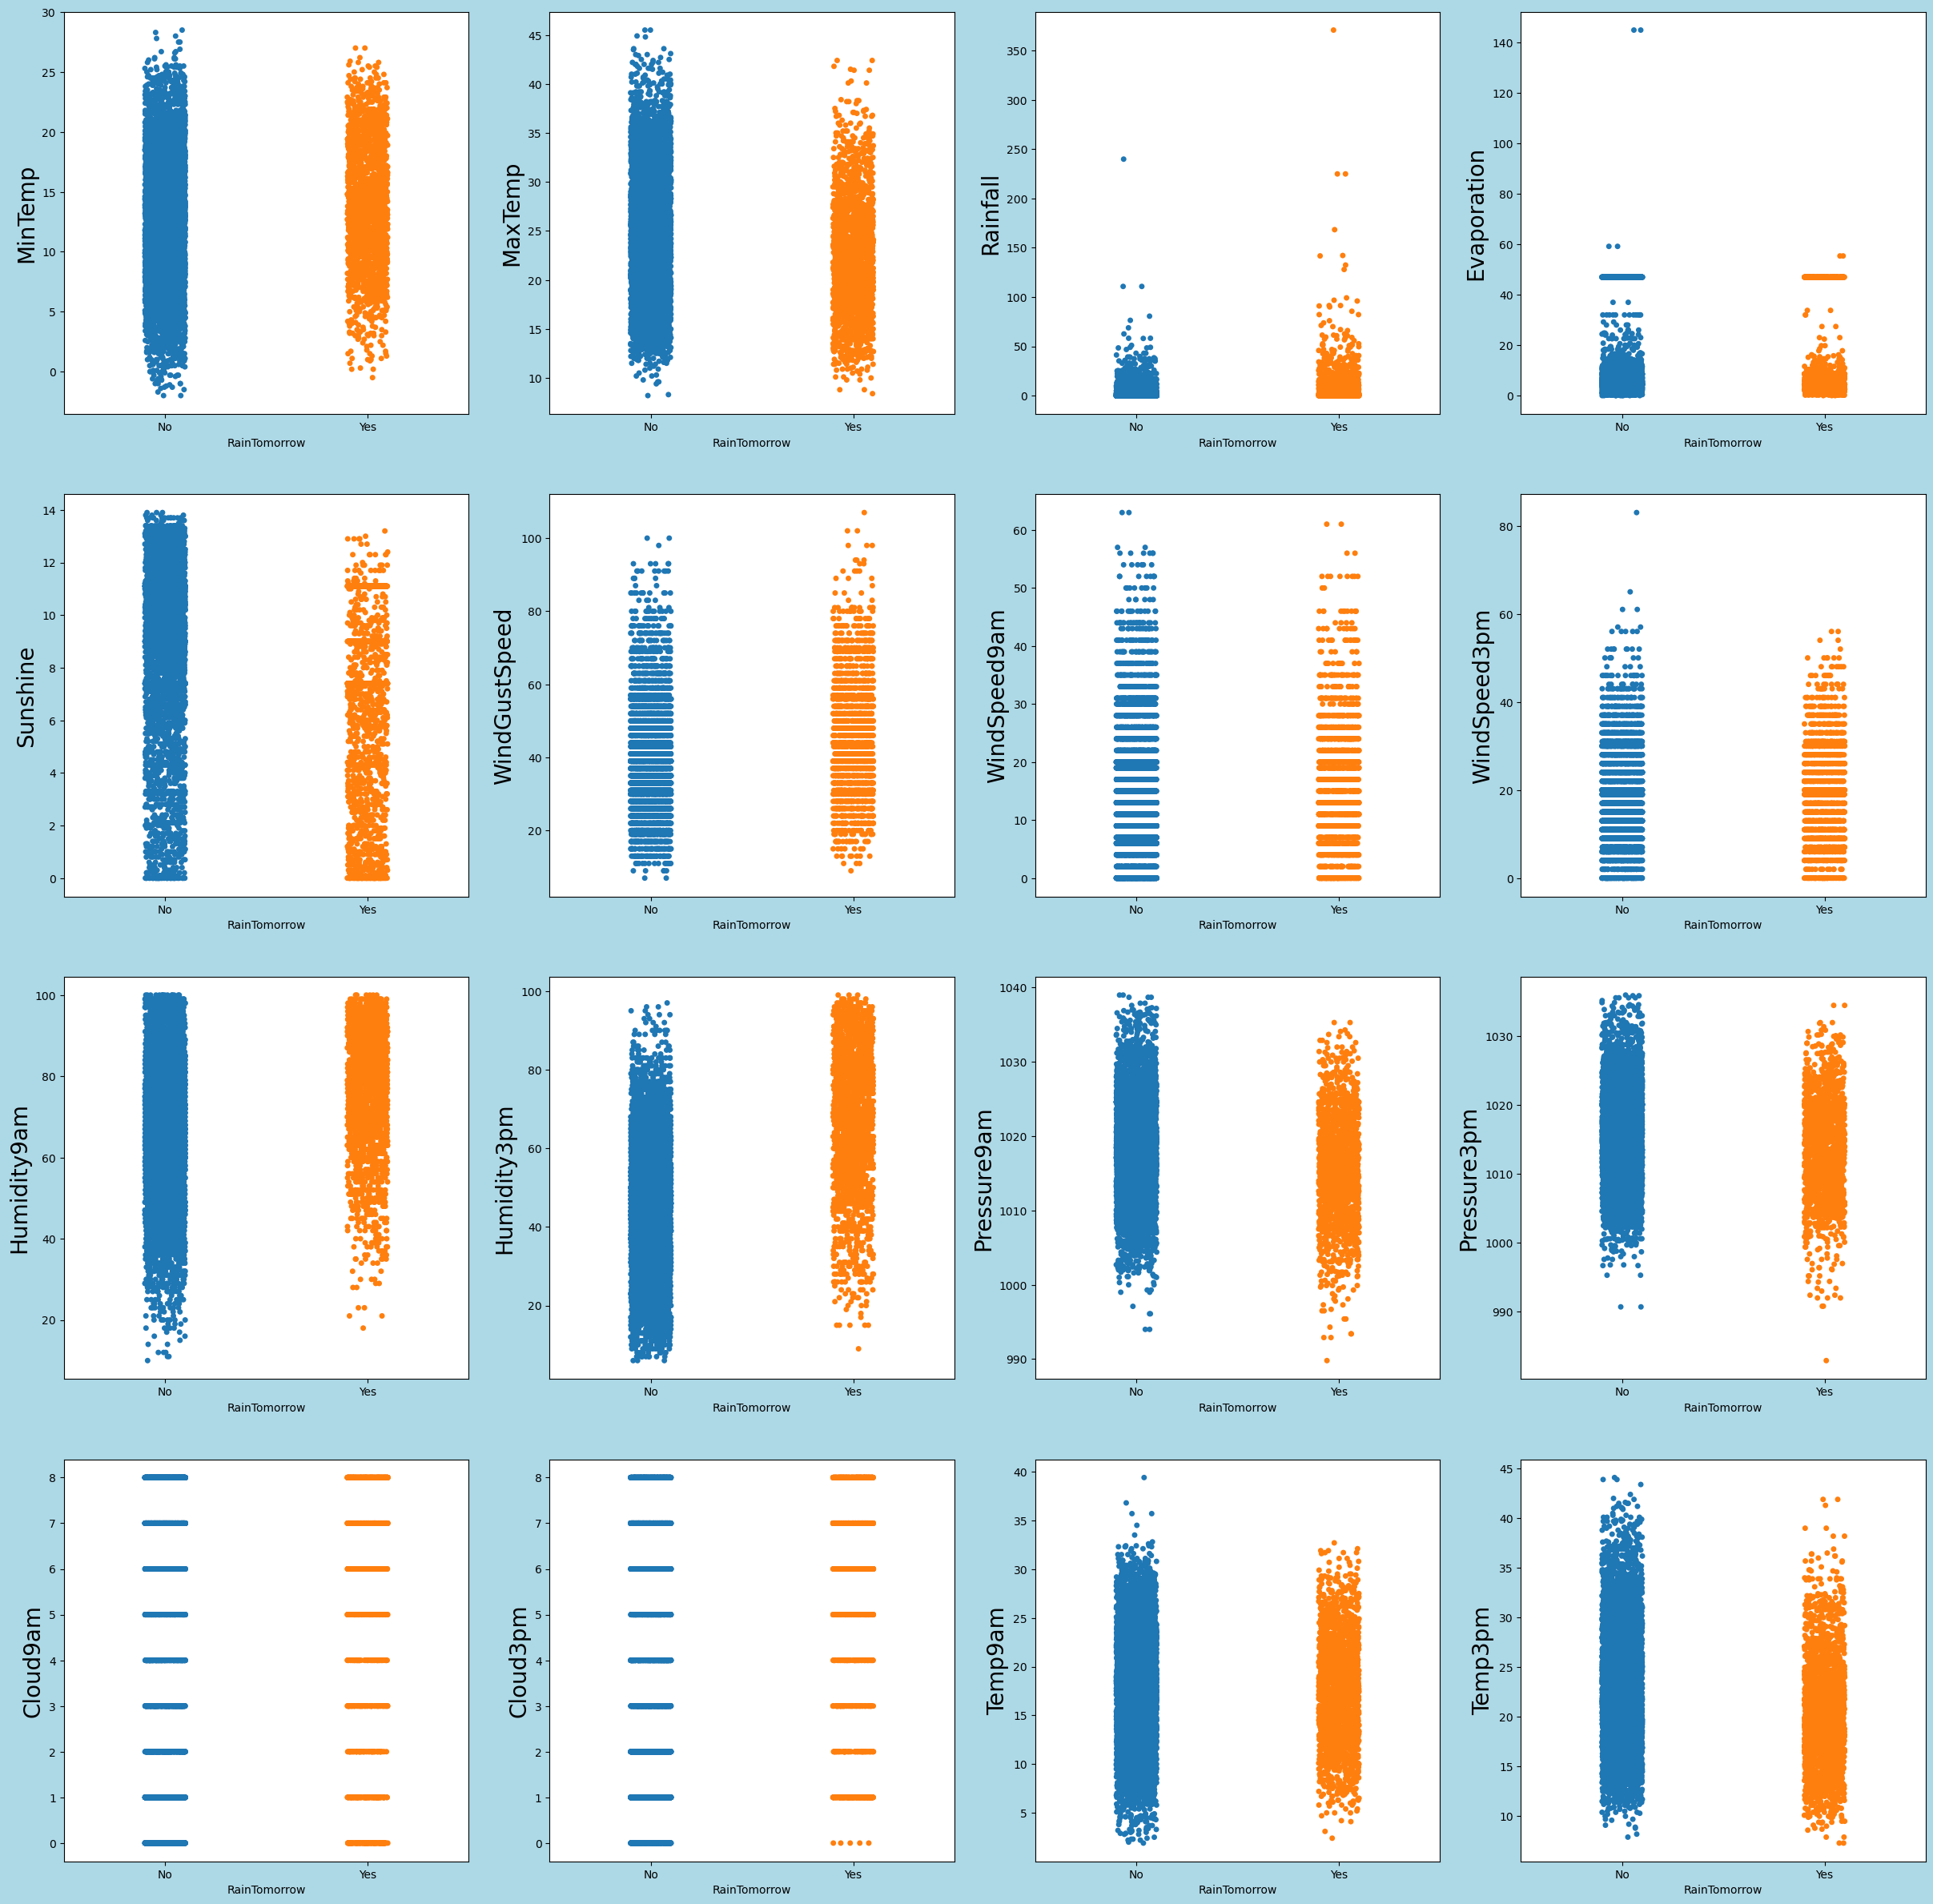

In [157]:
plt.figure(figsize=(30, 30), facecolor="lightblue")
plotnumber = 1
for i in df1: 
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.stripplot(y=df1[i], x=df['RainTomorrow'], data=df1)
        plt.ylabel(i,fontsize = 20)
    plotnumber += 1
plt.show()

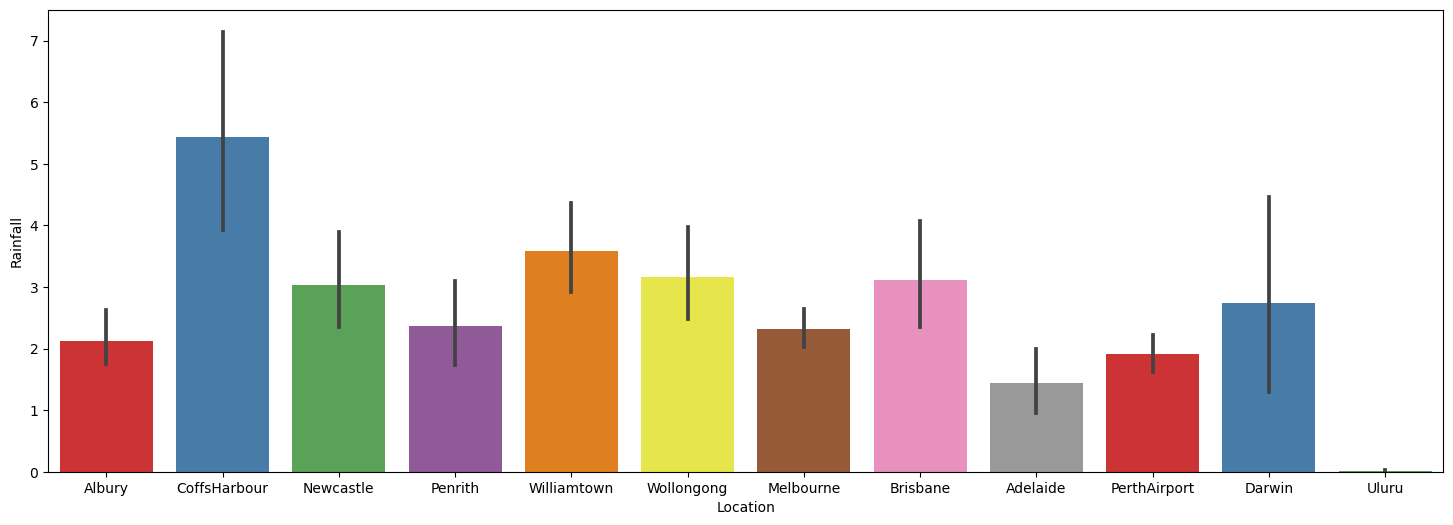

In [138]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Location', y='Rainfall', data=df, palette='Set1')
plt.xlabel('Location')
plt.ylabel('Rainfall')
plt.show()

here we can see that CoffsHarbour has most of rainfall

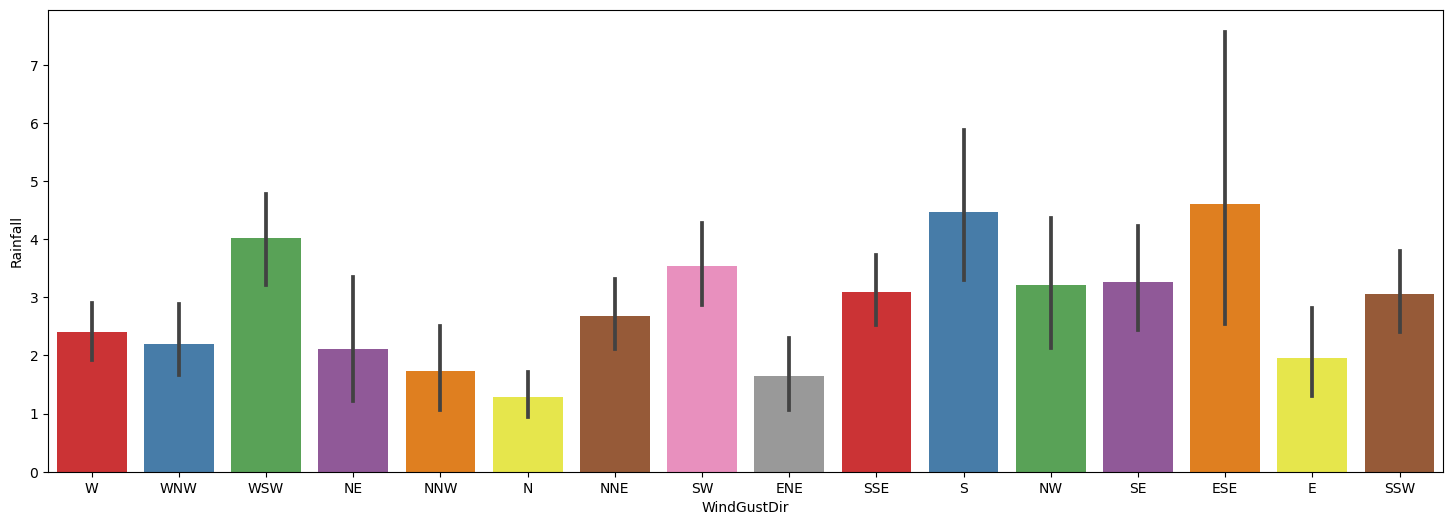

In [137]:
plt.figure(figsize=(18, 6))
sns.barplot(x='WindGustDir', y='Rainfall', data=df, palette='Set1') 
plt.xlabel('WindGustDir')
plt.ylabel('Rainfall')
plt.show()

here we can see that most WindGustDir that are Westsouth west,South,Eastsouth East has more rainfall

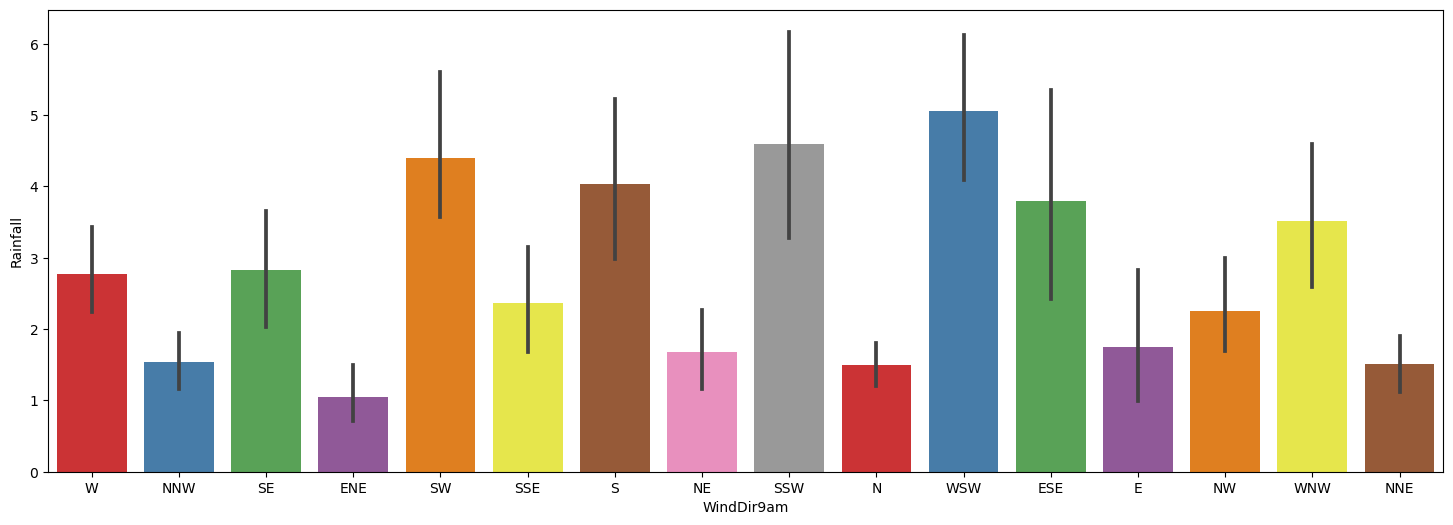

In [139]:
plt.figure(figsize=(18, 6))
sns.barplot(x='WindDir9am', y='Rainfall', data=df, palette='Set1')
plt.xlabel('WindDir9am')
plt.ylabel('Rainfall')
plt.show()

here we can see that at 9 am wind direction that are Southwest,South,Southsouth West,WestSouth West recieves more rainfall

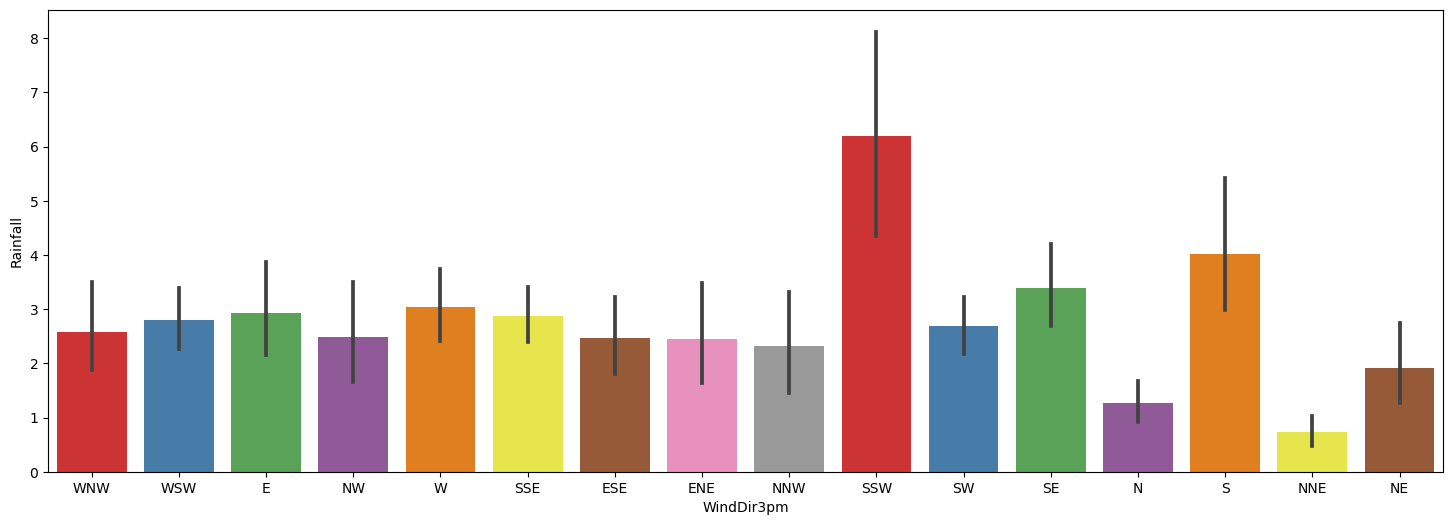

In [140]:
plt.figure(figsize=(18, 6))
sns.barplot(x='WindDir3pm', y='Rainfall', data=df, palette='Set1')
plt.xlabel('WindDir3pm')
plt.ylabel('Rainfall')
plt.show()

here we can see that at 3pm wind direction SouthSouth west recieves most rainfall

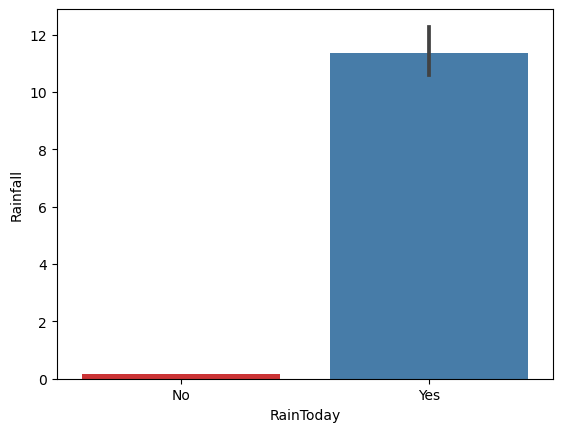

In [141]:
sns.barplot(x='RainToday', y='Rainfall', data=df, palette='Set1')
plt.xlabel('RainToday')
plt.ylabel('Rainfall')
plt.show()

here we can see that there is more rainfall

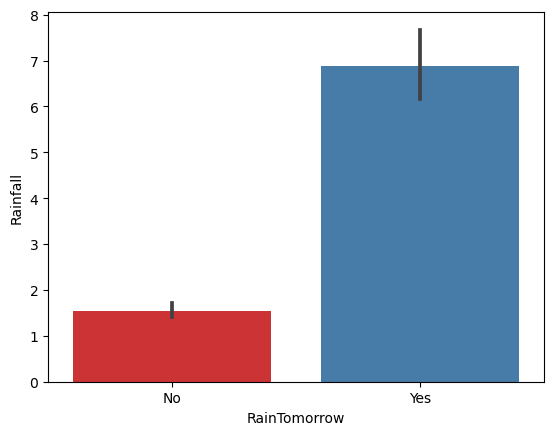

In [142]:
sns.barplot(x='RainTomorrow', y='Rainfall', data=df, palette='Set1')
plt.xlabel('RainTomorrow')
plt.ylabel('Rainfall')
plt.show()

here we can see that there is more rainfall but to compare from raintoday there is less rainfall 

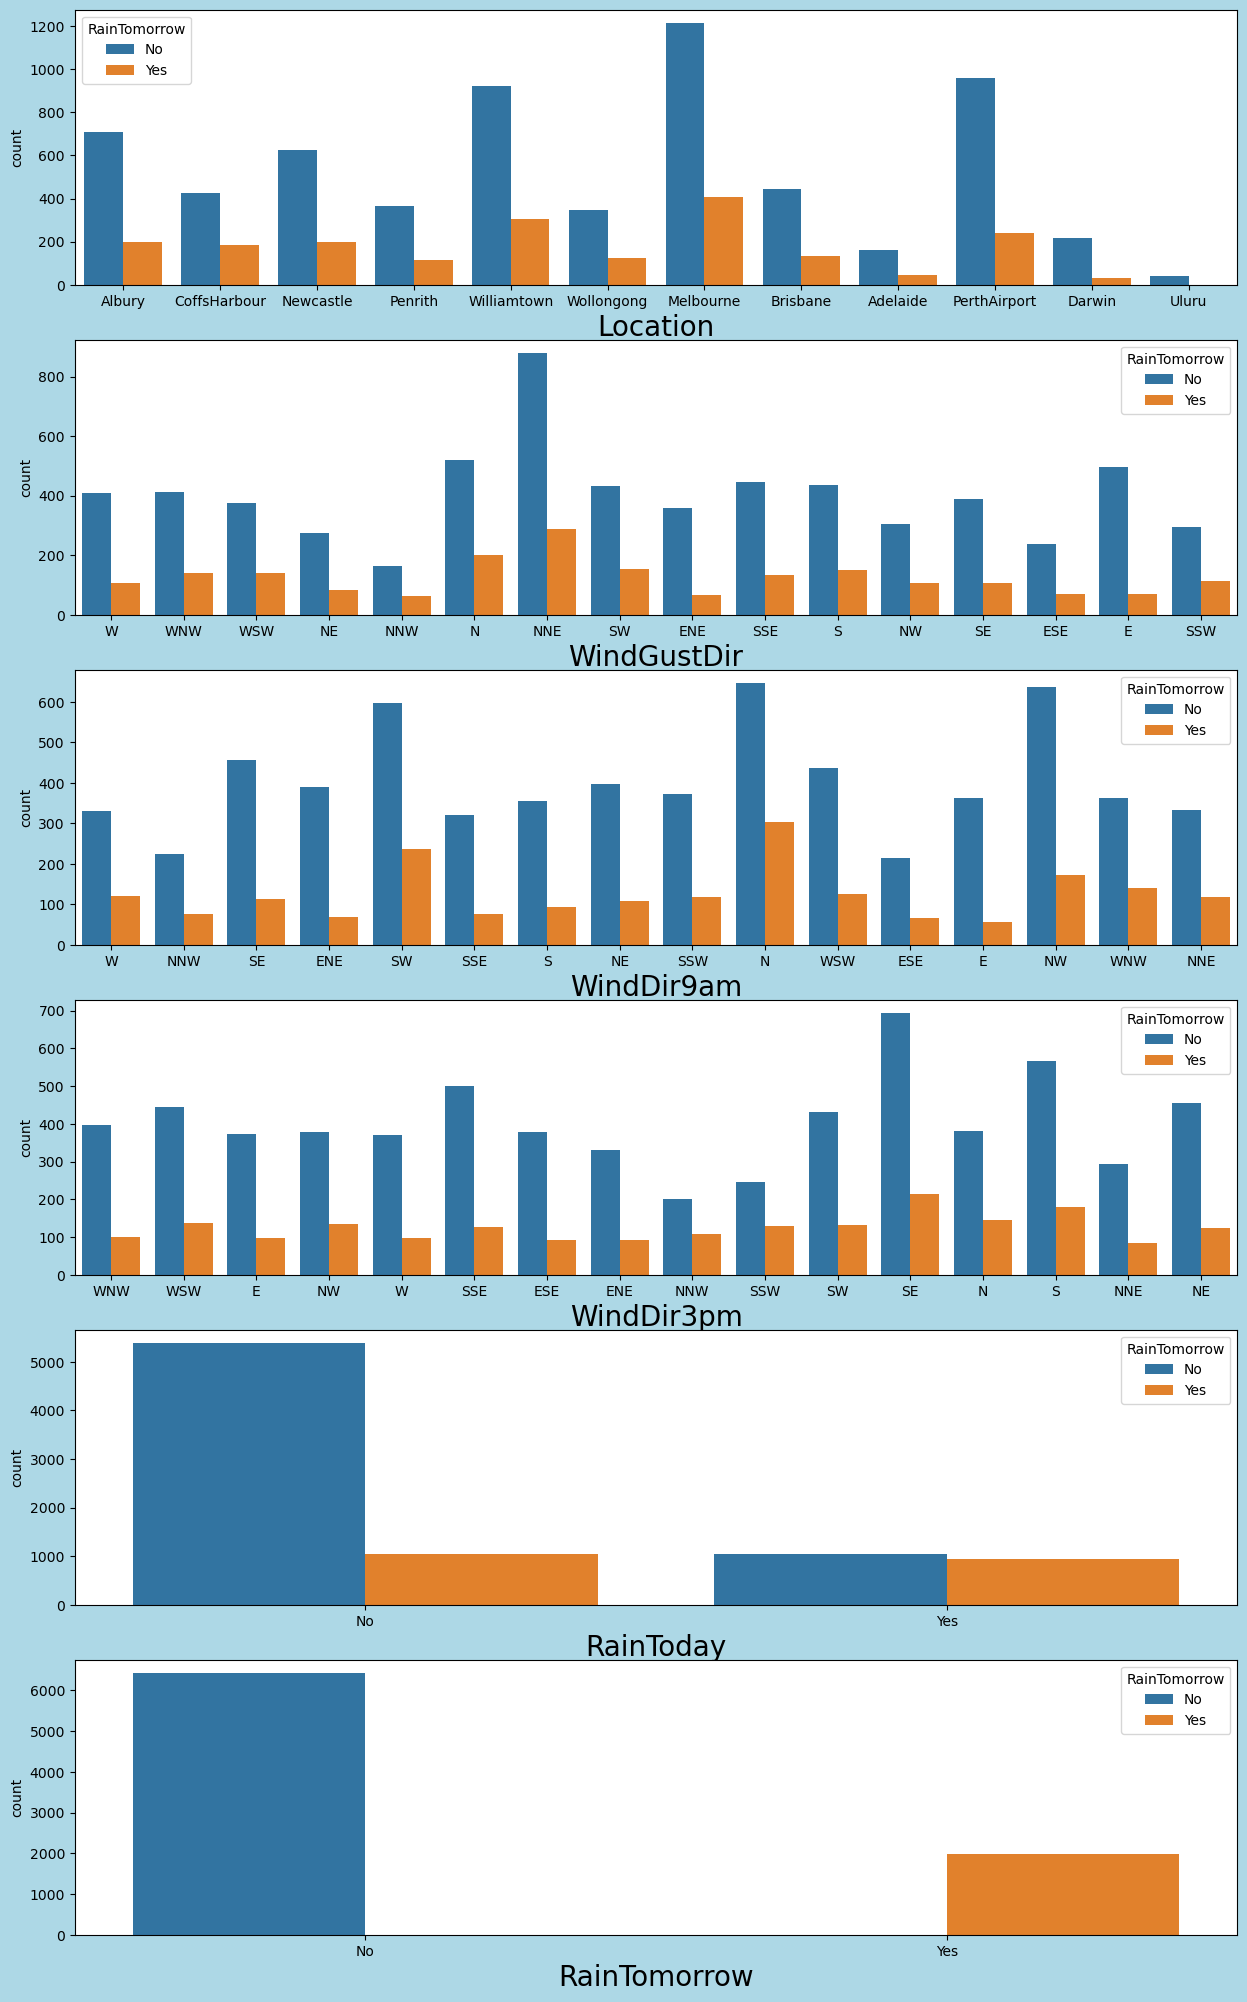

In [150]:
plt.figure(figsize=(15, 25), facecolor="lightblue")
plotnumber = 1
for i in df2: 
    if plotnumber <= 6:
        ax = plt.subplot(6, 1, plotnumber)
        sns.countplot(x=df2[i],hue=df['RainTomorrow'])
        plt.xlabel(i,fontsize = 20)
    plotnumber += 1
plt.show()

here we can that in graph raintomorrow is comparitively more in Mellbourne,Williamtown

and in graph 2 raintomorrow is comparitively more in Northnortheast WindgustDirection

in graph3 in Winddirection at 9am raintomorrow is comparitively more in north and southwest

in graph4 in Winddirection at 3pm raintomorrow is comparitively more in southeast

in graph5 if we compare raintomorrow and raintoday we have very less days when there is rain for both days

## checking for outliers

In [14]:
df1 = df.select_dtypes(include=['int', 'float'])

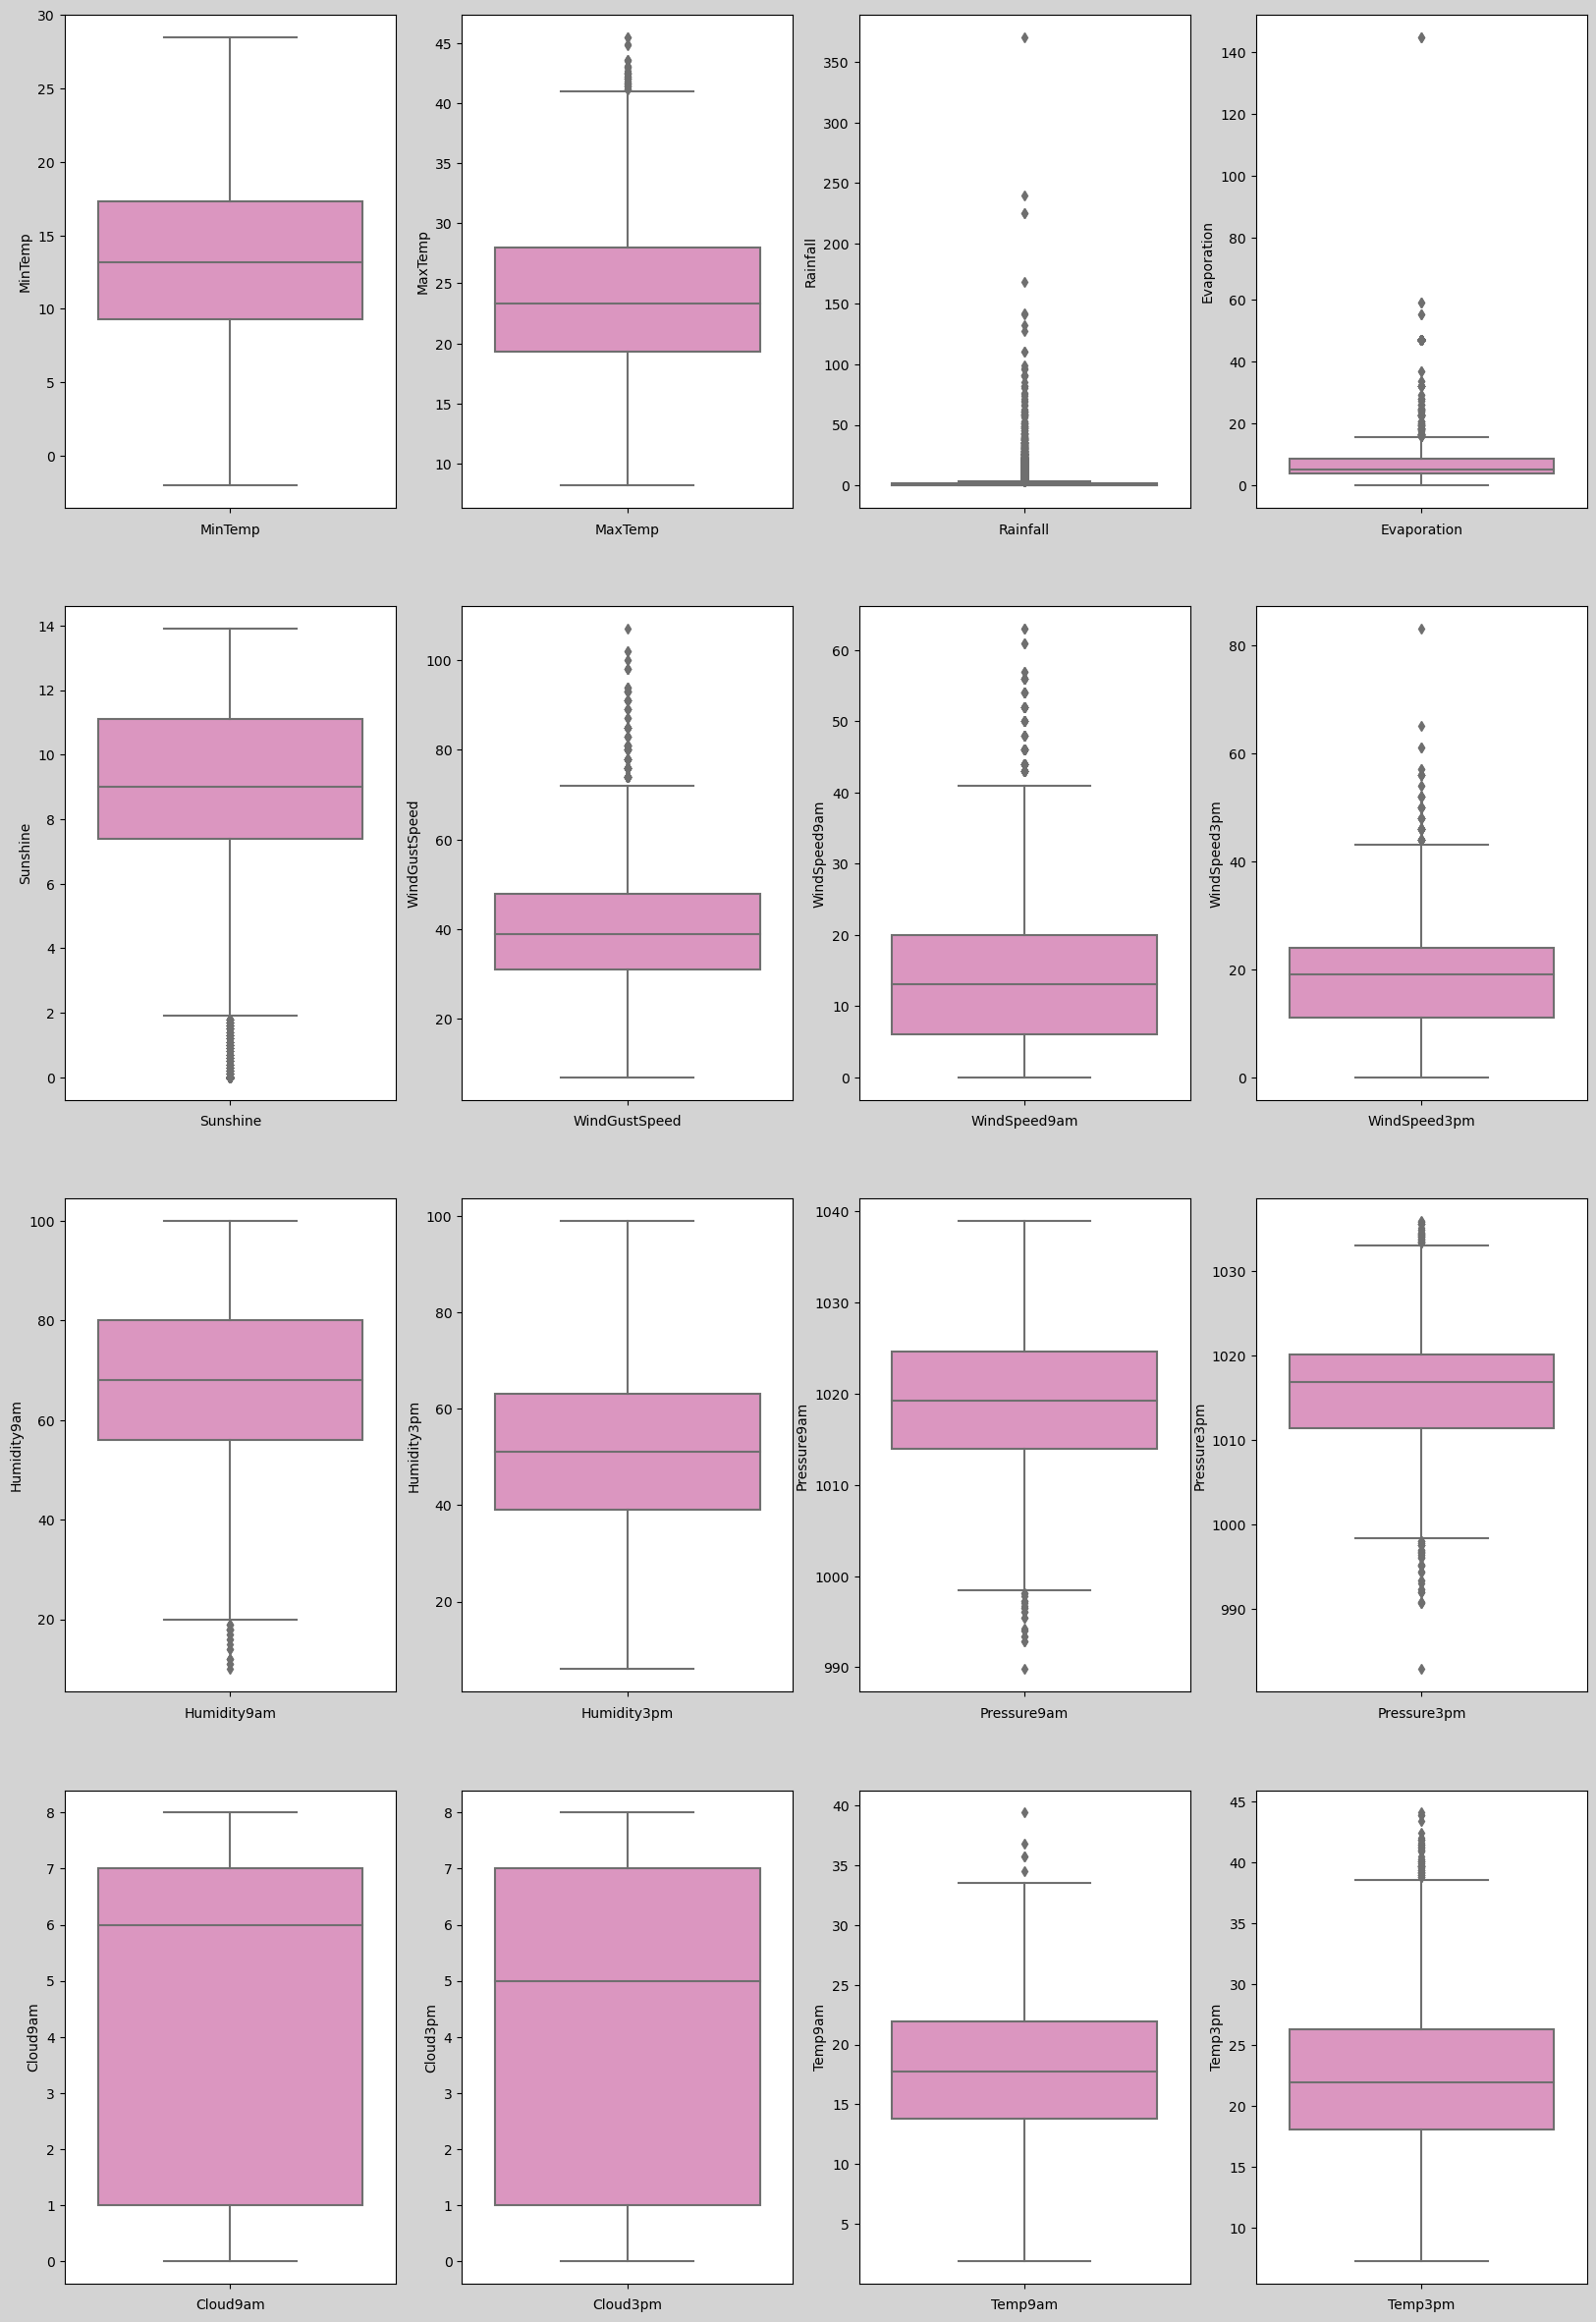

In [15]:
plt.figure(figsize=(20, 30), facecolor="lightgrey")
plotnumber = 1
for i in df1: 
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot( y = df1[i] , palette = 'Set2_r')
        plt.xlabel(i)
    plotnumber += 1
plt.show()

here we can see that there are outliers present in the data in most of the features and we will remove outliers 

In [16]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.038425,1.570089e-01,0.213986,0.085929,0.243230,0.287630,0.608197,0.562679,0.185566,1.581523,1.629346,1.376067,1.106995,0.869616,0.153712,0.108138
1,1.076989,2.028121e-01,0.272189,0.085929,0.243230,0.287630,0.971536,0.356585,1.418279,1.419072,1.200630,1.267736,1.106995,0.869616,0.100217,0.312348
2,0.054526,3.009450e-01,0.272189,0.085929,0.243230,0.432763,0.509464,0.768772,1.774688,1.148320,1.644130,1.128453,1.106995,0.869616,0.577390,0.127334
3,0.742365,6.771214e-01,0.272189,0.085929,0.243230,1.163698,0.280403,0.983024,1.358877,1.906424,0.165799,0.493942,1.106995,0.869616,0.060269,0.682376
4,0.800625,1.380408e+00,0.175183,0.085929,0.243230,0.069931,0.675336,0.150491,0.838984,0.985869,1.171064,1.546302,0.775105,1.294897,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,0.272189,0.316975,0.119618,0.655733,0.082936,0.776930,1.002467,1.473222,0.869032,0.666748,1.106995,0.934145,1.366273,0.007221
8421,1.783418,2.355231e-01,0.272189,0.316975,0.119618,1.308831,0.082936,0.983024,0.705459,1.635673,0.706415,0.481038,1.106995,0.934145,1.223619,0.345987
8422,1.448794,4.972110e-01,0.272189,0.316975,0.119618,0.220335,0.477869,0.983024,0.883664,1.473222,0.336833,0.125093,1.106995,0.934145,0.938310,0.615099
8423,1.002628,5.135665e-01,0.272189,0.316975,0.119618,0.873433,0.082936,1.189118,1.002467,1.473222,0.100300,0.078665,0.552454,0.869616,0.474684,0.598279


In [17]:
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  683,  683,  699,  713,  748,
         770,  796,  797,  802,  928,  935,  949,  979,  980,  980,  980,
        1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1202, 1203, 1237,
        1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513,
        1535, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1873, 1898,
        1903, 1945, 2016, 2028, 2043, 2063, 2074, 2108, 2116, 2186, 2201,
        2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527,
        2541, 2593, 2676, 2677, 2735, 2849, 2859, 2890, 2898, 2900, 2901,
        2909, 3003, 3051, 3051, 3059, 3066, 3067, 3067, 3067, 3068, 3070,
        3082, 3082, 3082, 3089, 3089, 3099, 3099, 3141, 3153, 3167, 3172,
        3178, 3206, 3212, 3212, 3234, 3248, 3248, 3271, 3278, 3278, 3291,
        3291, 3302, 3302, 3303, 3350, 

In [18]:
df2= df[(z<3).all(axis=1)]

In [19]:
print('percentage of dataloss',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

percentage of dataloss 4.059347181008902


In [20]:
df=df2

In [21]:
df1 = df.select_dtypes(include=['int', 'float'])

here we removed the outliers

### -- Checking for Skewness

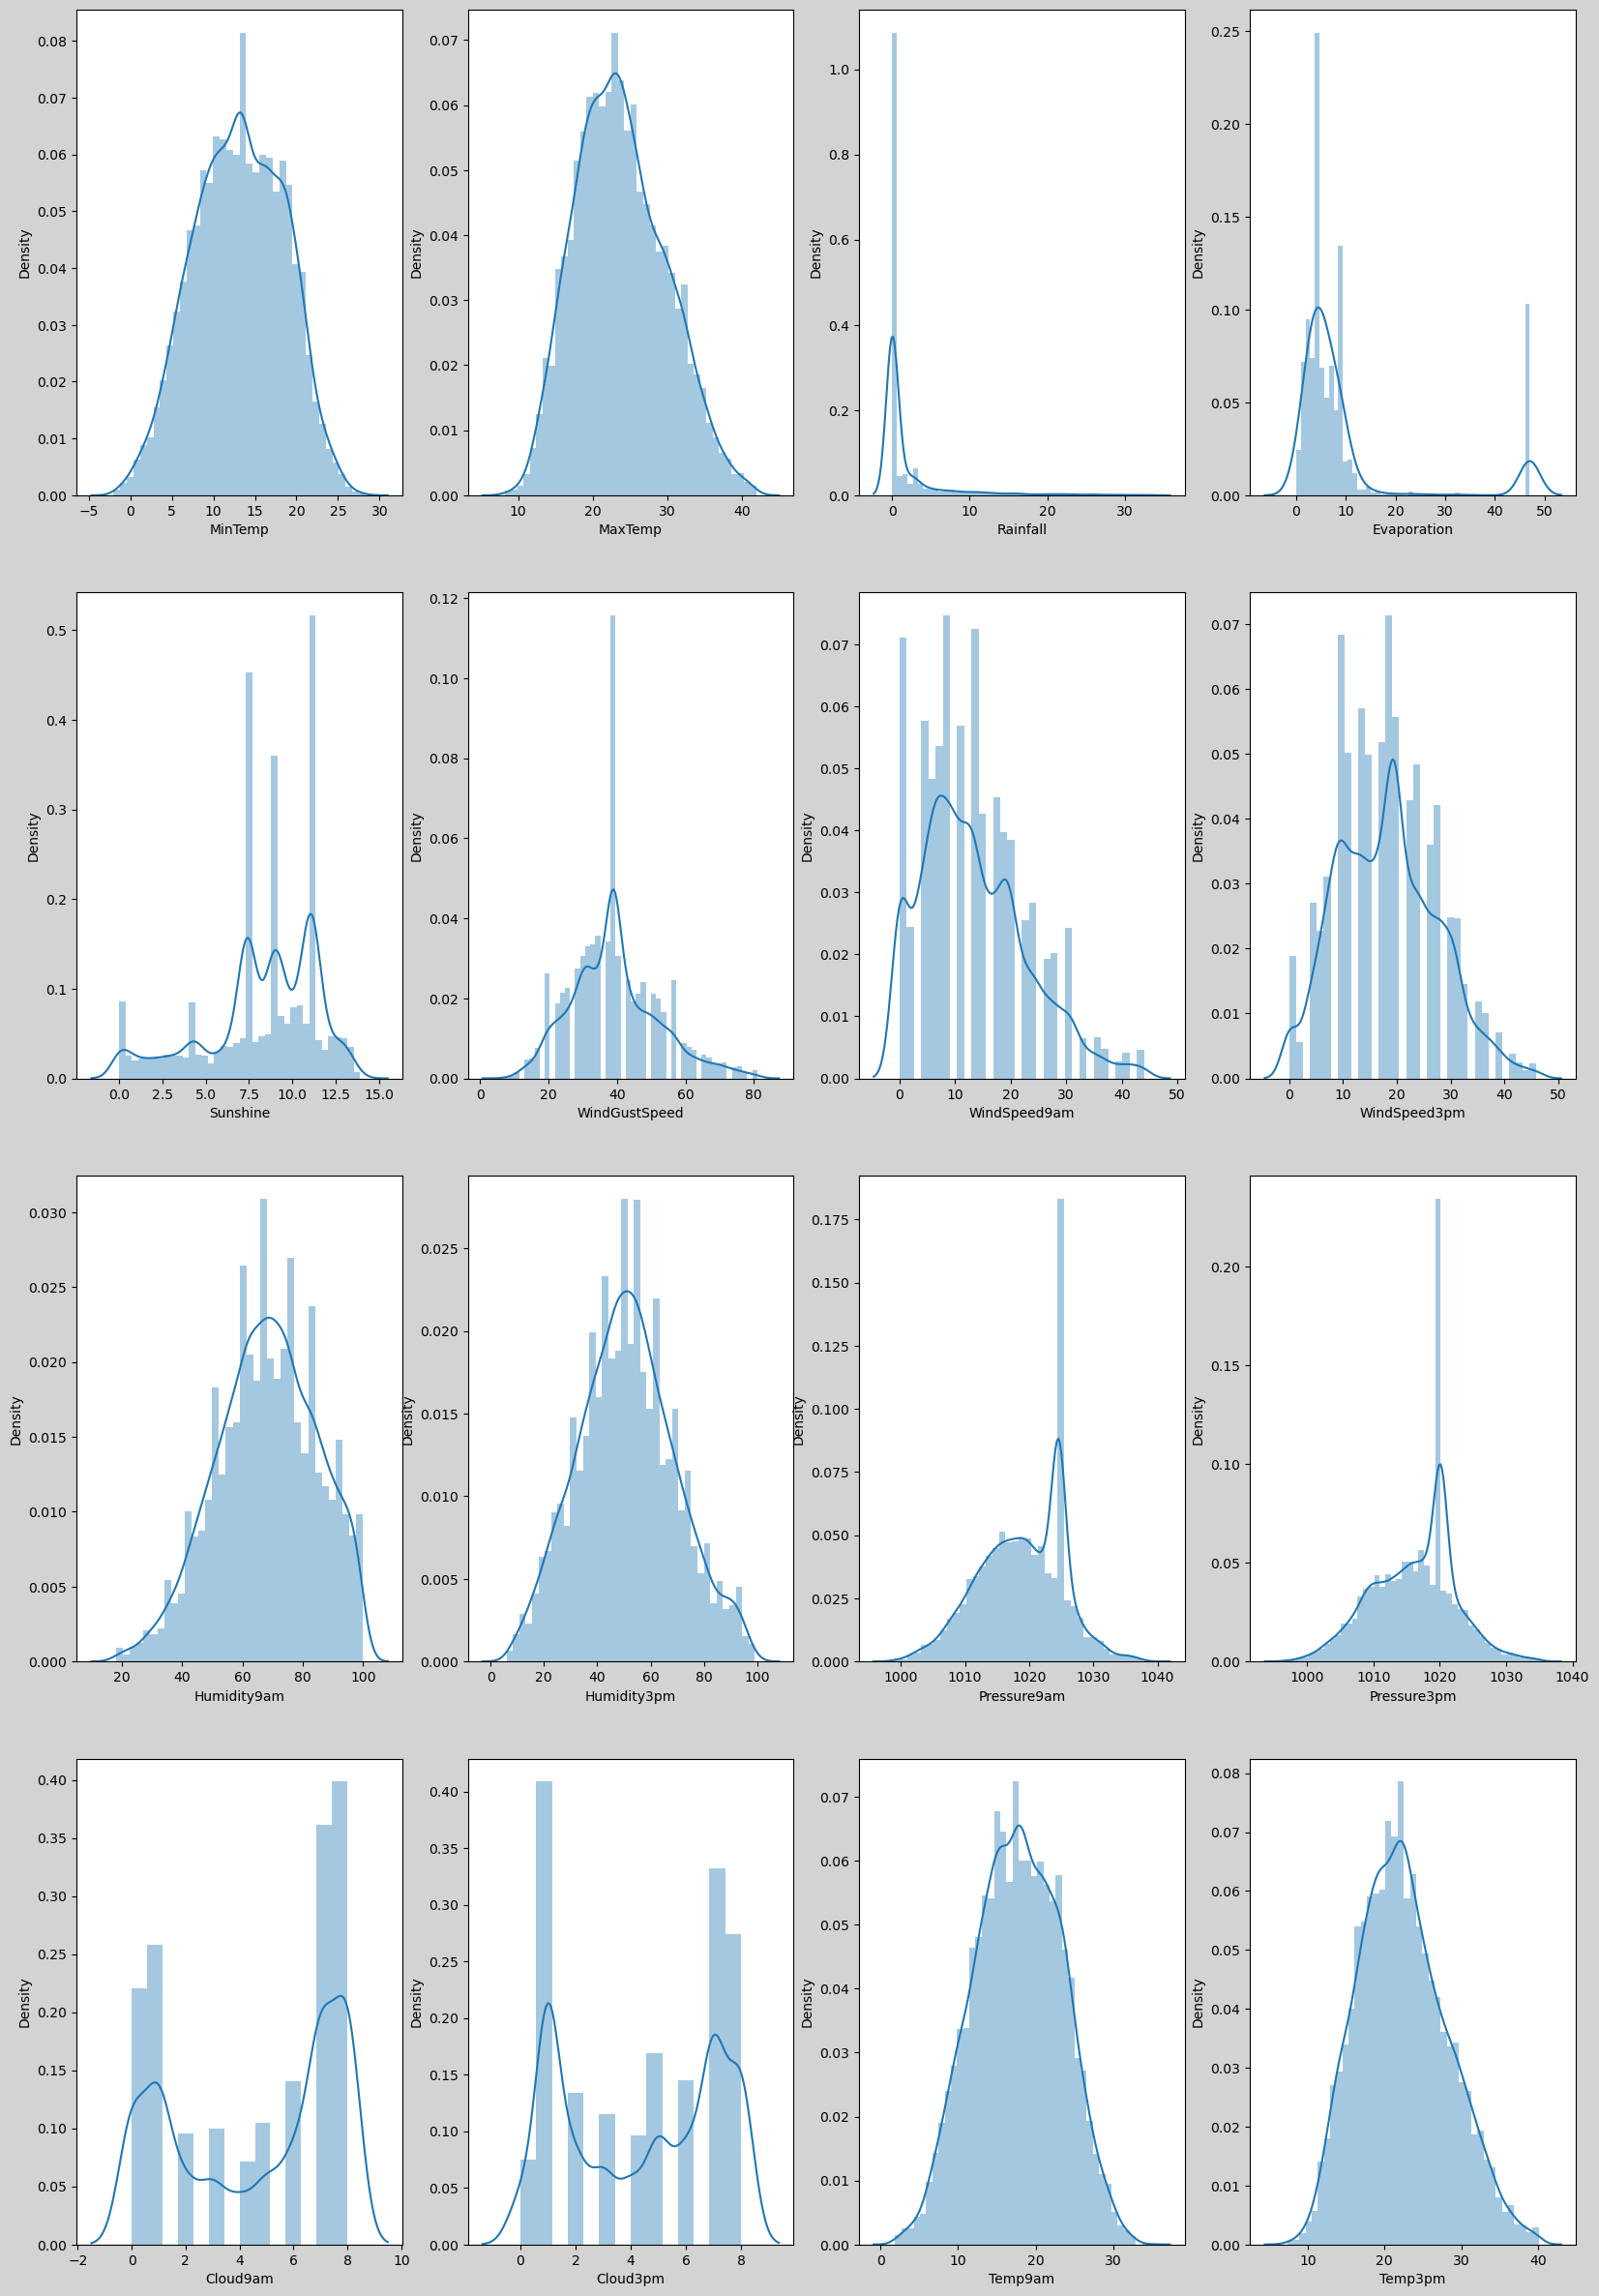

In [22]:
plt.figure(figsize=(20, 30), facecolor="lightgrey")
plotnumber = 1
for i in df1: 
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df1[i])
        plt.xlabel(i)
    plotnumber += 1
plt.show()

In [23]:
df.skew()

MinTemp         -0.087450
MaxTemp          0.312001
Rainfall         3.484512
Evaporation      2.424510
Sunshine        -0.890193
WindGustSpeed    0.544376
WindSpeed9am     0.714234
WindSpeed3pm     0.296046
Humidity9am     -0.226934
Humidity3pm      0.133852
Pressure9am     -0.269124
Pressure3pm     -0.209306
Cloud9am        -0.340666
Cloud3pm        -0.109648
Temp9am         -0.044681
Temp3pm          0.330989
dtype: float64

here we can see that some of the features are positively skewed so we will remove the skewness

In [24]:
df[['Rainfall', 'Evaporation']] = np.cbrt(df[['Rainfall', 'Evaporation']])

In [25]:
df.skew()

MinTemp         -0.087450
MaxTemp          0.312001
Rainfall         1.327557
Evaporation      1.448840
Sunshine        -0.890193
WindGustSpeed    0.544376
WindSpeed9am     0.714234
WindSpeed3pm     0.296046
Humidity9am     -0.226934
Humidity3pm      0.133852
Pressure9am     -0.269124
Pressure3pm     -0.209306
Cloud9am        -0.340666
Cloud3pm        -0.109648
Temp9am         -0.044681
Temp3pm          0.330989
dtype: float64

In [26]:
df[['Rainfall', 'Evaporation']] = np.sqrt(df[['Rainfall', 'Evaporation']])


In [27]:
df.skew()

MinTemp         -0.087450
MaxTemp          0.312001
Rainfall         0.811982
Evaporation      0.649463
Sunshine        -0.890193
WindGustSpeed    0.544376
WindSpeed9am     0.714234
WindSpeed3pm     0.296046
Humidity9am     -0.226934
Humidity3pm      0.133852
Pressure9am     -0.269124
Pressure3pm     -0.209306
Cloud9am        -0.340666
Cloud3pm        -0.109648
Temp9am         -0.044681
Temp3pm          0.330989
dtype: float64

here we removed the skewness

### checking for correlation 

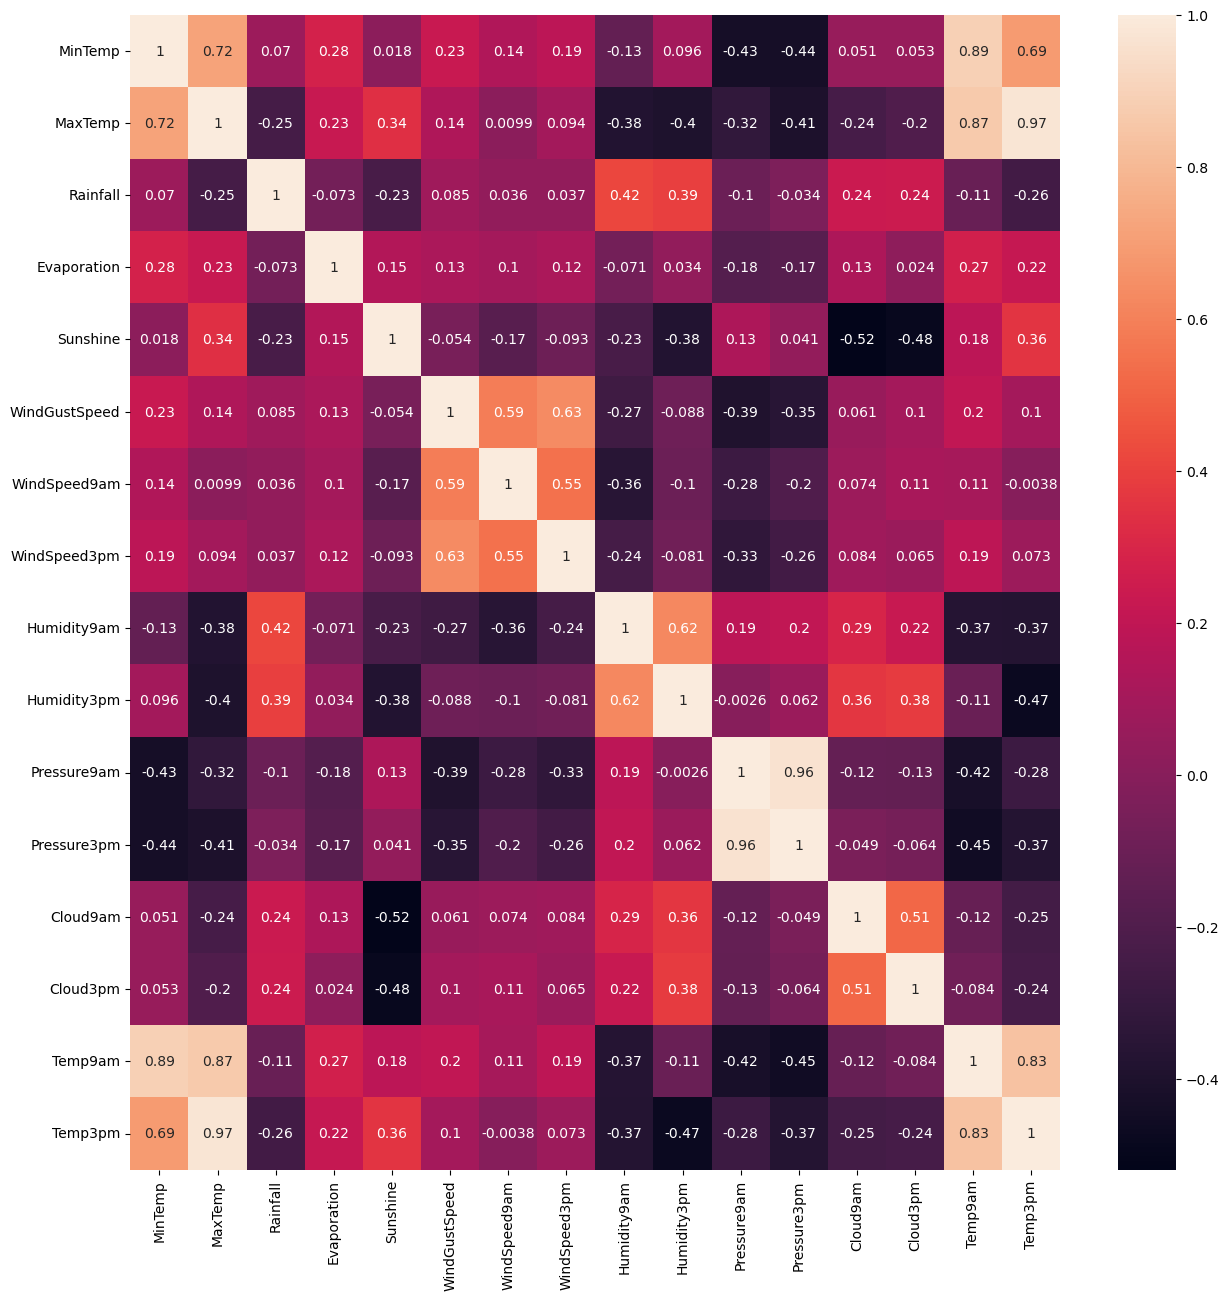

In [28]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True)
plt.show()

here we can see that MinTimp,MaxTemp,Temp9am,Temp3pm,Pressure9am,Pressure3pm have high correlation witheachother so there can be multicollinearity in the dataset we will later check in the model

### using label encoder

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


# FOR TRAGET VARIABLE 'RAINFALL'(REGRESSION MODELS)

### Seperating features and target variable

In [39]:
X=  df.drop(['Rainfall','Date'], axis = 1)
Y=df['Rainfall'] 

### Scaling using Standard Scalar

In [40]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.510263,0.055638,-0.148611,0.340895,0.227645,1.200450,0.374108,1.161873,1.390799,0.712253,...,0.180165,-1.607641,-1.713948,-1.455966,1.114979,-0.855296,-0.139449,-0.101802,-0.54098,-0.541935
1,-1.510263,-1.057952,0.217327,0.340895,0.227645,1.419184,0.374108,-0.384040,1.614268,-0.989029,...,-1.453788,-1.442385,-1.271322,-1.343848,1.114979,-0.855296,-0.085726,0.325862,-0.54098,-0.541935
2,-1.510263,-0.037161,0.317128,0.340895,0.227645,1.637917,0.530629,1.161873,1.614268,0.605922,...,-1.816888,-1.166960,-1.729211,-1.199697,1.114979,-0.855296,0.594773,0.137690,-0.54098,-0.541935
3,-1.510263,-0.723875,0.699700,0.340895,0.227645,-0.768152,-1.191105,0.278494,-1.737766,-0.244718,...,-1.393271,-1.938151,-0.202915,-0.543008,1.114979,-0.855296,0.075445,0.702207,-0.54098,-0.541935
4,-1.510263,0.816590,1.414942,0.340895,0.227645,1.200450,0.139326,-1.488263,-0.173484,-0.670039,...,0.845850,-1.001705,-1.240796,-1.632151,0.783422,1.311674,0.021721,1.249617,-0.54098,-0.541935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,1.017880,-1.911703,-0.065443,-0.090649,0.102656,-1.643086,-0.643281,0.278494,-1.514297,-0.032058,...,-1.030170,-1.497470,0.865493,0.658252,1.114979,0.950512,-1.357183,0.000838,-0.54098,-0.541935
8079,1.017880,-1.763225,0.250594,-0.090649,0.102656,-0.330685,-1.347627,0.278494,-1.067359,-0.032058,...,-0.727586,-1.662726,0.697600,0.466051,1.114979,0.950512,-1.213921,0.360075,-0.54098,-0.541935
8080,1.017880,-1.429148,0.516731,-0.090649,0.102656,-0.986885,-0.173717,0.278494,1.390799,-0.457379,...,-0.909137,-1.497470,0.316026,0.097664,1.114979,0.950512,-0.927395,0.633780,-0.54098,-0.541935
8081,1.017880,-0.983712,0.533364,-0.090649,0.102656,0.325516,-0.878063,0.499339,-1.067359,-0.032058,...,-1.030170,-1.497470,0.071819,0.049614,-0.542805,-0.855296,-0.461791,0.616674,-0.54098,-0.541935


### Checking for VIF

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif
                                                                         

,VIF values,Features
0,1.378752,Location
1,7.764370,MinTemp
2,26.771183,MaxTemp
3,1.435504,Evaporation
4,1.902367,Sunshine
5,1.658326,WindGustDir
6,2.332223,WindGustSpeed
7,1.304616,WindDir9am
8,1.478735,WindDir3pm
9,2.103215,WindSpeed9am


here we can see that all the features have high VIF in some features so we there is  multicollinearity and we will remove some features to remove it 

In [42]:
X = X.drop(['Temp3pm'], axis = 1)

In [44]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,1.378687,Location
1,7.731272,MinTemp
2,9.252846,MaxTemp
3,1.426835,Evaporation
4,1.902292,Sunshine
5,1.655600,WindGustDir
6,2.308291,WindGustSpeed
7,1.303817,WindDir9am
8,1.477854,WindDir3pm
9,2.096786,WindSpeed9am


In [45]:
X = X.drop(['Pressure9am'], axis = 1)

In [46]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,1.355300,Location
1,7.684796,MinTemp
2,9.000599,MaxTemp
3,1.409658,Evaporation
4,1.869920,Sunshine
5,1.612646,WindGustDir
6,2.308150,WindGustSpeed
7,1.289203,WindDir9am
8,1.441816,WindDir3pm
9,2.048774,WindSpeed9am


In [48]:
X = X.drop(['Temp9am'], axis = 1)

In [49]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,1.337534,Location
1,4.144886,MinTemp
2,5.253794,MaxTemp
3,1.407335,Evaporation
4,1.868348,Sunshine
5,1.612039,WindGustDir
6,2.268883,WindGustSpeed
7,1.288997,WindDir9am
8,1.441177,WindDir3pm
9,2.018533,WindSpeed9am


here we removed multicollinearity by removing some features

## Creating train test Split

In [50]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (X,Y, test_size = 0.25 , random_state = i)

In [51]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
LR = LinearRegression()
RIG= Ridge()
SVM=SVR()
RFR=RandomForestRegressor()
DTR = DecisionTreeRegressor()
abr = AdaBoostRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## Models

#### Ridge

In [52]:
RIG.fit(X_train, Y_train)
y_pred = RIG.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.732472147984929


In [53]:
y_pred_testRIG  = RIG.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRIG ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7194646313308597


In [54]:
mae = mean_absolute_error(Y_test, y_pred_testRIG)
mse = mean_squared_error(Y_test, y_pred_testRIG)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.22842980447518116
Mean Squared Error -->: 0.09719415074756554
Root Mean Squared Error-->: 0.3117597644783007


#### Support vector model (svm)

In [55]:
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.8250786280308735


In [56]:
y_pred_testSVM  = SVM.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testSVM ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7606149340334737


In [57]:
mae = mean_absolute_error(Y_test, y_pred_testSVM)
mse = mean_squared_error(Y_test, y_pred_testSVM)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.1817039206884349
Mean Squared Error -->: 0.08293723639427109
Root Mean Squared Error-->: 0.2879882573895524


#### Linear Regression

In [58]:
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.7324721691075662


In [59]:
y_pred_testLR  = LR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7194577496538614


In [60]:
mae = mean_absolute_error(Y_test, y_pred_testLR)
mse = mean_squared_error(Y_test, y_pred_testLR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.22842150631713545
Mean Squared Error -->: 0.09719653497011381
Root Mean Squared Error-->: 0.31176358826860107


#### DecisionTreeRegressor

In [61]:
DTR.fit(X_train, Y_train)
y_pred = DTR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 1.0


In [62]:
y_pred_testDTR  = DTR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testDTR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.6774040616200183


In [63]:
mae = mean_absolute_error(Y_test, y_pred_testDTR)
mse = mean_squared_error(Y_test, y_pred_testDTR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.14929514707704755
Mean Squared Error -->: 0.11176643577671415
Root Mean Squared Error-->: 0.3343148751950983


#### AdaBoost Regressor

In [64]:
abr.fit(X_train, Y_train)
y_pred = abr.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.6882659251729966


In [65]:
y_pred_testABR  = abr.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testABR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.676247681640137


In [66]:
mae = mean_absolute_error(Y_test, y_pred_testABR)
mse = mean_squared_error(Y_test, y_pred_testABR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.2947085251480814
Mean Squared Error -->: 0.11216707463597546
Root Mean Squared Error-->: 0.3349135330738002


#### Random Forest Regressor

In [67]:
RFR.fit(X_train, Y_train)
y_pred = RFR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.975405888297328


In [68]:
y_pred_testRFR  = RFR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8201102677204632


In [69]:
mae = mean_absolute_error(Y_test, y_pred_testRFR)
mse = mean_squared_error(Y_test, y_pred_testRFR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.16650866593284702
Mean Squared Error -->: 0.0623245113087226
Root Mean Squared Error-->: 0.24964877590070936


we will further check that which model to use by using the cross validation 

## Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
cscore1 = cross_val_score(abr,X,Y)
print('Cscore for AdaBoost Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for AdaBoost Regressor->  [0.736068   0.66213485 0.64918643 0.62040614 0.68465988]
mean of cscore->  0.6704910611573751
difference between R2 and cross validation score is 0.005756620482761932


In [72]:
cscore1 = cross_val_score(LR,X,Y)
print('Cscore for Linaer Regression -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testLR)-cscore1.mean())

Cscore for Linaer Regression ->  [0.78834509 0.66977545 0.70433201 0.64370339 0.81246251]
mean of cscore->  0.7237236915770865
difference between R2 and cross validation score is -0.004265941923225047


In [73]:
cscore1 = cross_val_score(RIG,X,Y)
print('Cscore for RIDGE-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testRIG)-cscore1.mean())

Cscore for RIDGE->  [0.78833393 0.66978022 0.70432664 0.64372038 0.81246392]
mean of cscore->  0.723725018409475
difference between R2 and cross validation score is -0.004260387078615313


In [74]:
cscore1 = cross_val_score(SVM,X,Y)
print('Cscore for Support Vector Model -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for Support Vector Model ->  [0.75595309 0.707584   0.74323294 0.6386027  0.76868894]
mean of cscore->  0.7228123358991112
difference between R2 and cross validation score is -0.04656465425897416


In [75]:
cscore1 = cross_val_score(DTR,X,Y)
print('Cscore for Decision Tree Regressor -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testDTR)-cscore1.mean())

Cscore for Decision Tree Regressor ->  [0.43805693 0.61509041 0.71886525 0.56537237 0.417985  ]
mean of cscore->  0.5510739913197369
difference between R2 and cross validation score is 0.12633007030028143


In [76]:
cscore1 = cross_val_score(RFR,X,Y)
print('Cscore for RandomForest Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testRFR)-cscore1.mean())

Cscore for RandomForest Regressor->  [0.76130666 0.78311059 0.8463846  0.71206729 0.77975005]
mean of cscore->  0.7765238364587004
difference between R2 and cross validation score is 0.04358643126176287


here based on cross validation score we choose RandomForestRegressor

## Hyper parameter tuning

In [77]:
RFR.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [78]:
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}


In [79]:
GSC = GridSearchCV(RandomForestRegressor(),parameters,cv= 5)

In [80]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [81]:
GSC.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [82]:
RFR_final = RandomForestRegressor(max_depth = None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators = 200)
RFR_final.fit(X_train, Y_train)
y_pred = RFR_final.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9762523044734833


In [83]:
y_pred_testRFR  = RFR_final.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8283927282233856


here we can see that after hyperparameter tuning our values increases slightly

## Model Saving

In [84]:
import joblib
joblib.dump(RFR_final,'Rainfall prediction report')

['Rainfall prediction report']

# Prediction 

In [85]:
mymodel = joblib.load('Rainfall prediction report')
prdt = mymodel.predict(X_test)
prdt

array([0.13401307, 0.10212655, 0.04122435, ..., 0.01727129, 0.07701196,
       0.        ])

## comparing from original 

In [86]:
a = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':a})
data1

,predicted,original
0,0.134013,0.000000
1,0.102127,0.000000
2,0.041224,0.000000
3,0.677341,0.764724
4,0.639079,0.764724
...,...,...
2016,1.315818,1.102924
2017,0.129764,0.000000
2018,0.017271,0.000000
2019,0.077012,0.000000


hence we can see that our model approximately predicted most of the values  

# FOR TRAGET VARIABLE ['RainTomorrow'] - CLASSIFICATION MODELS

### Seperating features and target variable

In [33]:
X=  df.drop(['RainTomorrow','Date'], axis = 1)
Y=df['RainTomorrow'] 

### Scaling using Standard Scalar

In [34]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.510263,0.055638,-0.148611,0.826641,0.340895,0.227645,1.200450,0.374108,1.161873,1.390799,...,0.635948,0.180165,-1.607641,-1.713948,-1.455966,1.114979,-0.855296,-0.139449,-0.101802,-0.54098
1,-1.510263,-1.057952,0.217327,-0.724882,0.340895,0.227645,1.419184,0.374108,-0.384040,1.614268,...,0.419051,-1.453788,-1.442385,-1.271322,-1.343848,1.114979,-0.855296,-0.085726,0.325862,-0.54098
2,-1.510263,-0.037161,0.317128,-0.724882,0.340895,0.227645,1.637917,0.530629,1.161873,1.614268,...,0.852846,-1.816888,-1.166960,-1.729211,-1.199697,1.114979,-0.855296,0.594773,0.137690,-0.54098
3,-1.510263,-0.723875,0.699700,-0.724882,0.340895,0.227645,-0.768152,-1.191105,0.278494,-1.737766,...,-0.990786,-1.393271,-1.938151,-0.202915,-0.543008,1.114979,-0.855296,0.075445,0.702207,-0.54098
4,-1.510263,0.816590,1.414942,0.964521,0.340895,0.227645,1.200450,0.139326,-1.488263,-0.173484,...,0.202153,0.845850,-1.001705,-1.240796,-1.632151,0.783422,1.311674,0.021721,1.249617,-0.54098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8078,1.017880,-1.911703,-0.065443,-0.724882,-0.090649,0.102656,-1.643086,-0.643281,0.278494,-1.514297,...,-0.773888,-1.030170,-1.497470,0.865493,0.658252,1.114979,0.950512,-1.357183,0.000838,-0.54098
8079,1.017880,-1.763225,0.250594,-0.724882,-0.090649,0.102656,-0.330685,-1.347627,0.278494,-1.067359,...,-0.990786,-0.727586,-1.662726,0.697600,0.466051,1.114979,0.950512,-1.213921,0.360075,-0.54098
8080,1.017880,-1.429148,0.516731,-0.724882,-0.090649,0.102656,-0.986885,-0.173717,0.278494,1.390799,...,-0.990786,-0.909137,-1.497470,0.316026,0.097664,1.114979,0.950512,-0.927395,0.633780,-0.54098
8081,1.017880,-0.983712,0.533364,-0.724882,-0.090649,0.102656,0.325516,-0.878063,0.499339,-1.067359,...,-1.207683,-1.030170,-1.497470,0.071819,0.049614,-0.542805,-0.855296,-0.461791,0.616674,-0.54098


### Checking for VIF

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif
                                                                         

,Features,VIF values
0,Location,1.379591
1,MinTemp,7.810744
2,MaxTemp,26.782165
3,Rainfall,3.694976
4,Evaporation,1.448083
5,Sunshine,1.882336
6,WindGustDir,1.658280
7,WindGustSpeed,2.242114
8,WindDir9am,1.310590
9,WindDir3pm,1.479149


here we can see that all the features have high VIF in some features so we there is  multicollinearity and we will remove some features to remove it 

In [36]:
X = X.drop(['Temp3pm'], axis = 1)

In [37]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif

,Features,VIF values
0,Location,1.379527
1,MinTemp,7.777626
2,MaxTemp,9.264725
3,Rainfall,3.694976
4,Evaporation,1.439411
5,Sunshine,1.882264
6,WindGustDir,1.655550
7,WindGustSpeed,2.218061
8,WindDir9am,1.309791
9,WindDir3pm,1.478268


In [38]:
X = X.drop(['Pressure9am'], axis = 1)

In [39]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif

,Features,VIF values
0,Location,1.356548
1,MinTemp,7.732794
2,MaxTemp,9.010516
3,Rainfall,3.689543
4,Evaporation,1.420987
5,Sunshine,1.852914
6,WindGustDir,1.613553
7,WindGustSpeed,2.216751
8,WindDir9am,1.295691
9,WindDir3pm,1.442169


In [40]:
X = X.drop(['Temp9am'], axis = 1)

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif

,Features,VIF values
0,Location,1.338457
1,MinTemp,4.179709
2,MaxTemp,5.276509
3,Rainfall,3.689074
4,Evaporation,1.418559
5,Sunshine,1.851195
6,WindGustDir,1.612934
7,WindGustSpeed,2.176394
8,WindDir9am,1.295451
9,WindDir3pm,1.441561


here we remove factors which has high VIF now there is no multicollinearity

### Oversampling

In [44]:
df.RainTomorrow.value_counts()

0    6248
1    1835
Name: RainTomorrow, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,Y = SM.fit_resample(X,Y)

In [46]:
Y.value_counts()

0    6248
1    6248
Name: RainTomorrow, dtype: int64

## Creating train test Split

In [47]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (X,Y, test_size = 0.25 , random_state = i)

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Models

#### AdaBoostClassifier

In [50]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8151941954758856


In [51]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.8015364916773368


In [52]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testABC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1567
           1       0.80      0.80      0.80      1557

    accuracy                           0.80      3124
   macro avg       0.80      0.80      0.80      3124
weighted avg       0.80      0.80      0.80      3124



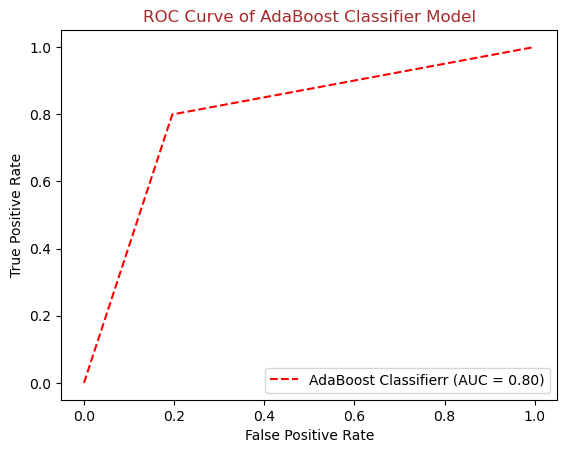

 Here we can area under the curve is --> 0.8015283100918551


In [53]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testABC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="AdaBoost Classifierr") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of AdaBoost Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### RandomForestClassifier

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [55]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9279769526248399


In [56]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testRFC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1567
           1       0.92      0.94      0.93      1557

    accuracy                           0.93      3124
   macro avg       0.93      0.93      0.93      3124
weighted avg       0.93      0.93      0.93      3124



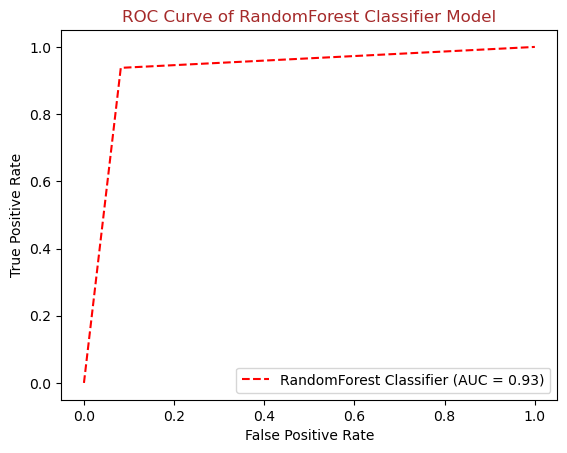

 Here we can area under the curve is --> 0.9280079792804302


In [57]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testRFC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="RandomForest Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of RandomForest Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### LogisticRegression 

In [58]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.7688860435339309


In [59]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7618437900128041


In [60]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testLR))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      1567
           1       0.77      0.75      0.76      1557

    accuracy                           0.76      3124
   macro avg       0.76      0.76      0.76      3124
weighted avg       0.76      0.76      0.76      3124



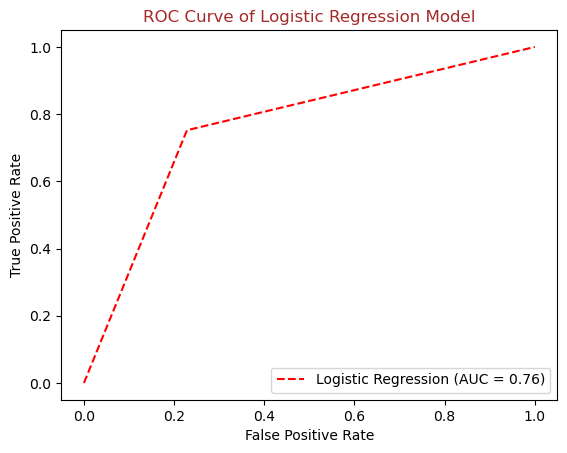

 Here we can area under the curve is --> 0.761812659053807


In [61]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testLR)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="Logistic Regression") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Logistic Regression Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### SVC

In [62]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8737729406743491


In [63]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8492317541613317


In [64]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testSVM))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1567
           1       0.83      0.87      0.85      1557

    accuracy                           0.85      3124
   macro avg       0.85      0.85      0.85      3124
weighted avg       0.85      0.85      0.85      3124



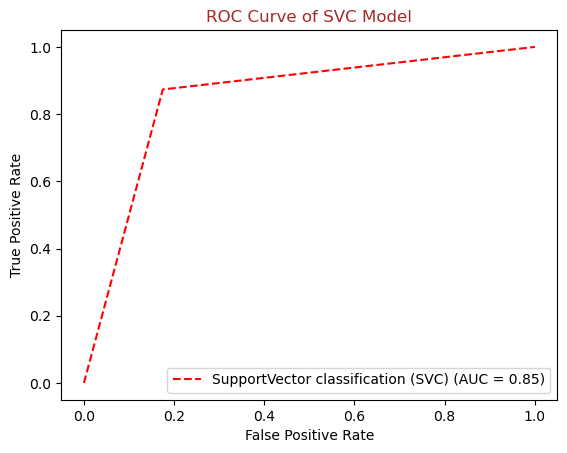

 Here we can area under the curve is --> 0.8493091085855139


In [65]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testSVM)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="SupportVector classification (SVC)") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of SVC Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### GradientBoostingClassifier 

In [66]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8699317114810072


In [67]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8514724711907811


In [68]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testGBC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1567
           1       0.85      0.86      0.85      1557

    accuracy                           0.85      3124
   macro avg       0.85      0.85      0.85      3124
weighted avg       0.85      0.85      0.85      3124



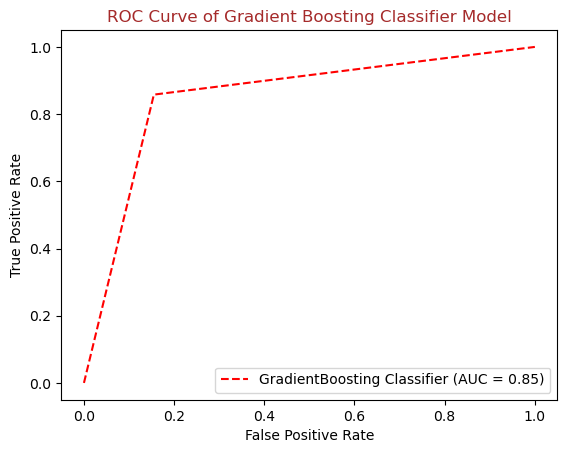

 Here we can area under the curve is --> 0.8514934919352625


In [69]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testGBC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="GradientBoosting Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Gradient Boosting Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### KNN

In [70]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9063166880068289


In [71]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8649167733674776


In [72]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testKNN))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      1567
           1       0.80      0.96      0.88      1557

    accuracy                           0.86      3124
   macro avg       0.88      0.87      0.86      3124
weighted avg       0.88      0.86      0.86      3124



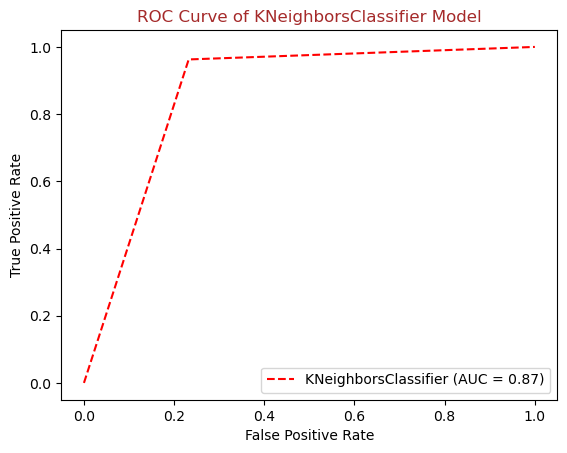

 Here we can area under the curve is --> 0.8652289370645938


In [73]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testKNN)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="KNeighborsClassifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of KNeighborsClassifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

we will further check that which model to use by using the cross validation 

## Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

In [77]:
cscore1 = cross_val_score(rfc,X,Y)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.672      0.71068427 0.8707483  0.88715486 0.84713886]
mean of cscore->  0.7975452581032413
difference between accuracy and cross validation score is 0.13043169452159864


In [78]:
cscore2 = cross_val_score(KNN,X,Y)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.7316     0.69147659 0.78231293 0.7735094  0.7595038 ]
mean of cscore->  0.747680544217687
difference between accuracy and cross validation score is 0.1172362291497906


In [79]:
cscore3 = cross_val_score(abc,X,Y)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.63       0.60144058 0.68107243 0.74069628 0.66426571]
mean of cscore->  0.6634949979991998
difference between accuracy and cross validation score is 0.138041493678137


In [80]:
cscore4 = cross_val_score(GBC,X,Y)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [0.5844     0.60864346 0.72428972 0.76710684 0.75310124]
mean of cscore->  0.6875082513005202
difference between accuracy and cross validation score is 0.1639642198902609


In [81]:
cscore5 = cross_val_score(SVM,X,Y)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.7208     0.69107643 0.73469388 0.78791517 0.80312125]
mean of cscore->  0.747521344537815
difference between accuracy and cross validation score is 0.10171040962351663


In [82]:
cscore6 = cross_val_score(log_R,X,Y)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.6736     0.71428571 0.62144858 0.71748699 0.81592637]
mean of cscore->  0.7085495318127252
difference between accuracy and cross validation score is 0.05329425820007894


here based on cross validation score we choose RandomForestClassifier

## Hyper parameter tuning

In [83]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [84]:
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 50, 100],
}


In [85]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [86]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_leaf_nodes': [None, 50, 100],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [87]:
GSC.best_params_

{'max_depth': 20,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [88]:
rfc_final =RandomForestClassifier(max_depth= 20,max_leaf_nodes= None,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 500)
rfc_final.fit(X_train, Y_train)
y_pred = rfc_final.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred )  
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [89]:
y_pred_testrfc  = rfc_final.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testrfc )  
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.9302176696542894


here we can see that after hyperparameter tuning  values increases slightly

## Model Saving

In [90]:
import joblib
joblib.dump(rfc_final, 'RainfallTomorrow prection')

['RainfallTomorrow prection']

# Prediction 

In [91]:
mymodel = joblib.load('RainfallTomorrow prection')
prdt = mymodel.predict(X_test)
prdt

array([0, 0, 0, ..., 0, 1, 1])

## comparing from original 

In [92]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
3119,1,1
3120,1,1
3121,0,0
3122,1,1


hence we can see that our model almost predicted all of the values  